<a href="https://colab.research.google.com/github/moripova/Data-Science-Projects/blob/main/Full_Code_Project_4_MO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center><font size=10>Data Science and Business Analytics</center></font></h1> 
<h1><center>Supervised Learning Classification:Case Study/Full Code</center></h1>
<h1><center>Mavluda Oripova </center></h1>

---
---


**Marks: 60**

<center><img src="https://innhotels.com/img/logo/Inn-Hotels-Official-color.png" width="500" height="300"></center>

<b><h2><center> Inn Hotels Project </center></h2></b>


## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations. 

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics. 

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

# **Importing necessary libraries and data**

---



In [ ]:
import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV


# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

In [ ]:
#Since we are using Google Colab, we will be connecting our notebook to the google drive where our data sets are located:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#We will load the data set to the notebook: 
hotel=pd.read_csv('/content/drive/MyDrive/PYTHON/M. Learning - Classification/Project 4/INNHotelsGroup.csv')

In [ ]:
# We will create a copy of the datafile to ensure that we have the original file unchanged:
df=hotel.copy()

# **Data Overview**

---





The initial steps to get an overview of any dataset is to:

- get information about the number of rows and columns in the dataset
- observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
-find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
-and check the statistical summary of the dataset to get an overview of the numerical columns of the data
- check for any missing values and treat them if necessary
- check for duplicates

### <font color='purple'>**Checking the shape of the dataset**</font>

In [ ]:
# First we will check the shape (number of rows and columns) in the dataset
df.shape

(36275, 19)

**Observations:**
- The data contains 19 columns and 36275 rows.

### <font color='purple'>**Checking the first and last few rows of the dataset**</font>


In [ ]:
# We will check for the first 5 rows of the dataset
df.head(5)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00000,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68000,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00000,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00000,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50000,0,Canceled


In [ ]:
# and the last 5 rows
df.tail(5)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80000,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95000,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39000,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50000,0,Canceled
36274,INN36275,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67000,0,Not_Canceled


**Observations**:
 - Based on the observed data we can see that there are 19 columns with variables presented in the dictionary.
  - We can see that there are both: categorical and numerical values in the dataset.
 

### <font color='purple'>**Checking the data types of the columns for the dataset**</font>


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

**Observations:**
- The datatype contains both numerical and string values (object). Further in the steps we may need to convert object values into categorical/numeric variables.

### <font color='purple'>**Statistical summary of the dataset**</font>

In [ ]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Booking_ID,36275,36275,INN00001,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_of_adults,36275.00000,NaN,NaN,NaN,1.84496,0.51871,0.00000,2.00000,2.00000,2.00000,4.00000
no_of_children,36275.00000,NaN,NaN,NaN,0.10528,0.40265,0.00000,0.00000,0.00000,0.00000,10.00000
no_of_weekend_nights,36275.00000,NaN,NaN,NaN,0.81072,0.87064,0.00000,0.00000,1.00000,2.00000,7.00000
no_of_week_nights,36275.00000,NaN,NaN,NaN,2.20430,1.41090,0.00000,1.00000,2.00000,3.00000,17.00000
type_of_meal_plan,36275,4,Meal Plan 1,27835,NaN,NaN,NaN,NaN,NaN,NaN,NaN
required_car_parking_space,36275.00000,NaN,NaN,NaN,0.03099,0.17328,0.00000,0.00000,0.00000,0.00000,1.00000
room_type_reserved,36275,7,Room_Type 1,28130,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lead_time,36275.00000,NaN,NaN,NaN,85.23256,85.93082,0.00000,17.00000,57.00000,126.00000,443.00000
arrival_year,36275.00000,NaN,NaN,NaN,2017.82043,0.38384,2017.00000,2018.00000,2018.00000,2018.00000,2018.00000


**Observations:**

- The average number of adults per booking is 2 adults, going up to 4 as the maximum number.
- The number of children range from 0 to 10 children.
- Number of weekend nights goes to the maximum of 7 nights.
- Number of weekday is higher on average, 2 nights than the weekend nights, 0.8, with the maximum weekday nights going up to 17 nights.
- The lead time average is 85 days, with the minimum being 0 and the maximum 443 days.
- Number of cancellations are 0.2 on average, with the maximum number of 13. Number of bookings that are not cancelled is higher, with the maximum of 58.
- Average price per room is 103 euros.  The room price can go upto 540 euros.
- The maximum number of special requests is 5.  

### <font color='purple'>**Checking for duplicate values**</font>

In [ ]:
df.duplicated().sum()

0

**Observations**:
- There are no duplicate values in the dataset

### <font color='purple'>**Checking for any missing values**</font>

In [ ]:
df.info()# by running this formula we can double check the data types for assurance.
df.isnull().sum()# this formula will help us see how many columns have missing data.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

**Observations**:
- There are no missing values in the dataset.

# **Exploratory Data Analysis (EDA)**

---





- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. What are the busiest months in the hotel?
2. Which market segment do most of the guests come from?
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
4. What percentage of bookings are canceled? 
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

## **Univariate Analysis**

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="purple"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins,color="purple"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2,color="purple"
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="blue", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="mako",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### <font color='purple'>**Lead Time**</font>

In [ ]:
# We will create the boxplot to get the summary of the variable, and also run a histplot to see the distribution of the values:
print('Sample Mean =',df['lead_time'].mean())
print('Sample Minimum =',df['lead_time'].min())
print('Sample Maximum =',df['lead_time'].max())
plt.show()

Sample Mean = 85.23255685733976
Sample Minimum = 0
Sample Maximum = 443


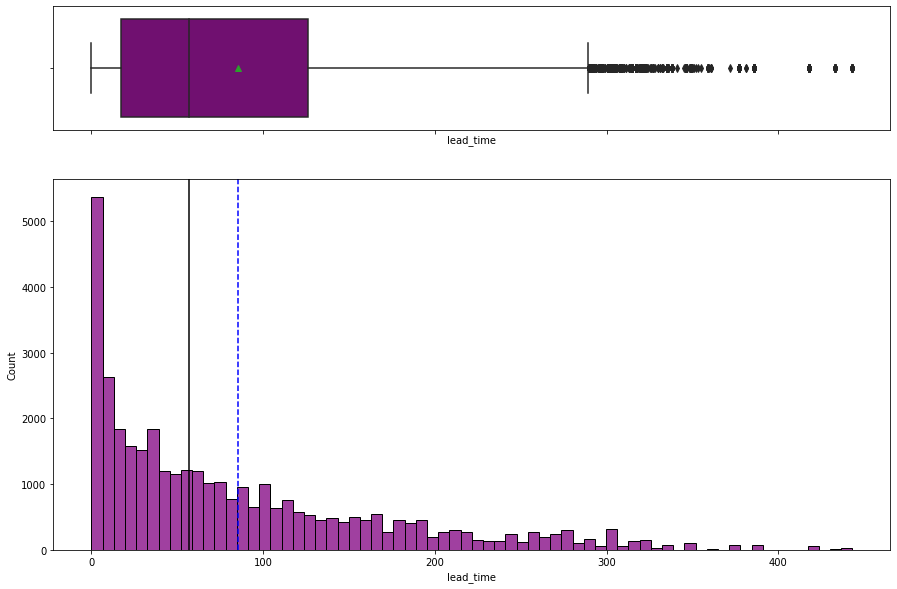

In [ ]:
histogram_boxplot(df, "lead_time")

**Observations:**

* The lead time variable is right skewed with many outliers on the upper quartile.
* There are many rooms booked more than 443 days prior to arrival.

### <font color='purple'>**Price per Room**</font>

In [ ]:
# We will create the boxplot to get the summary of the variable, and also run a histplot to see the distribution of the values:
print('Sample Mean =',df['avg_price_per_room'].mean())
print('Sample Minimum =',df['avg_price_per_room'].min())
print('Sample Maximum =',df['avg_price_per_room'].max())
plt.show()

Sample Mean = 103.42353907649897
Sample Minimum = 0.0
Sample Maximum = 540.0


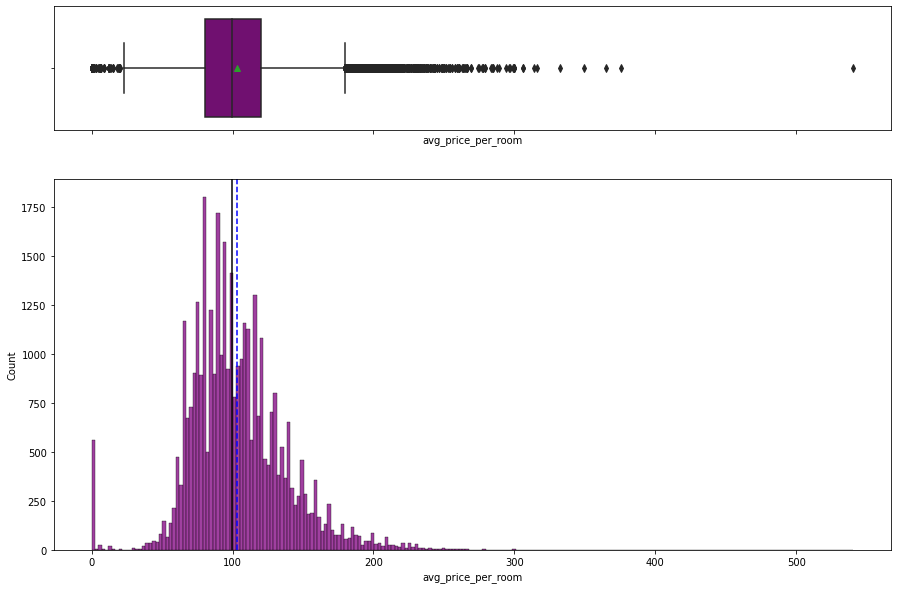

In [ ]:
histogram_boxplot(df, "avg_price_per_room")

**Observations:**
- The average price is considerably normally distributed with outliers present on both whisker sides, especially high on the upper quartile.

In [ ]:
# We noticed that some rooms have 0 average price. Let's see which rows have the 0 average price, were free:
df[df["avg_price_per_room"] == 0]

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
63,INN00064,1,0,0,1,Meal Plan 1,0,Room_Type 1,2,2017,9,10,Complementary,0,0,0,0.00000,1,Not_Canceled
145,INN00146,1,0,0,2,Meal Plan 1,0,Room_Type 1,13,2018,6,1,Complementary,1,3,5,0.00000,1,Not_Canceled
209,INN00210,1,0,0,0,Meal Plan 1,0,Room_Type 1,4,2018,2,27,Complementary,0,0,0,0.00000,1,Not_Canceled
266,INN00267,1,0,0,2,Meal Plan 1,0,Room_Type 1,1,2017,8,12,Complementary,1,0,1,0.00000,1,Not_Canceled
267,INN00268,1,0,2,1,Meal Plan 1,0,Room_Type 1,4,2017,8,23,Complementary,0,0,0,0.00000,1,Not_Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35983,INN35984,1,0,0,1,Meal Plan 1,0,Room_Type 7,0,2018,6,7,Complementary,1,4,17,0.00000,1,Not_Canceled
36080,INN36081,1,0,1,1,Meal Plan 1,0,Room_Type 7,0,2018,3,21,Complementary,1,3,15,0.00000,1,Not_Canceled
36114,INN36115,1,0,0,1,Meal Plan 1,0,Room_Type 1,1,2018,3,2,Online,0,0,0,0.00000,0,Not_Canceled
36217,INN36218,2,0,2,1,Meal Plan 1,0,Room_Type 2,3,2017,8,9,Online,0,0,0,0.00000,2,Not_Canceled


**Observations:**
- We see that 545 bookings were free of charge.

In [ ]:
# Let's check what the market segment was for the free rooms:
df.loc[df["avg_price_per_room"] == 0, "market_segment_type"].value_counts()

Complementary    354
Online           191
Name: market_segment_type, dtype: int64

**Observations**:
- It is no surprise that most of the free bookings, 354, were complementary. 191 bookings were made online.

In [ ]:
# We will replace the outliers in the average price columns with the value of upper whisker. First we need to calculate the value.
# Calculating the 25th quantile
Q1 = df["avg_price_per_room"].quantile(0.25)

# Calculating the 75th quantile
Q3 = df["avg_price_per_room"].quantile(0.75)  
# Calculating IQR
IQR = Q3 - Q1

# Calculating value of upper whisker
Upper_Whisker = Q3 + 1.5 * IQR
Upper_Whisker

179.55

In [ ]:
# assigning the outliers the value of upper whisker
df.loc[df["avg_price_per_room"] >= 500, "avg_price_per_room"] = Upper_Whisker

**Observations:**
- Once we have calculated the interquartile range of the prices and calculated the value of upper whisker, we assigned the outliers equal or above 500 the value of 179.55.


### <font color='purple'>**Previous Booking Cancellations**</font>

In [ ]:
#Let's check the distribution of the booking status:
df['booking_status'].value_counts(normalize=True)

Not_Canceled   0.67236
Canceled       0.32764
Name: booking_status, dtype: float64

In [ ]:
# We will create the boxplot to get the summary of the variable, and also run a histplot to see the distribution of the values:
print('Sample Mean =',df['no_of_previous_cancellations'].mean())
print('Sample Minimum =',df['no_of_previous_cancellations'].min())
print('Sample Maximum =',df['no_of_previous_cancellations'].max())
plt.show()

Sample Mean = 0.023349414197105445
Sample Minimum = 0
Sample Maximum = 13


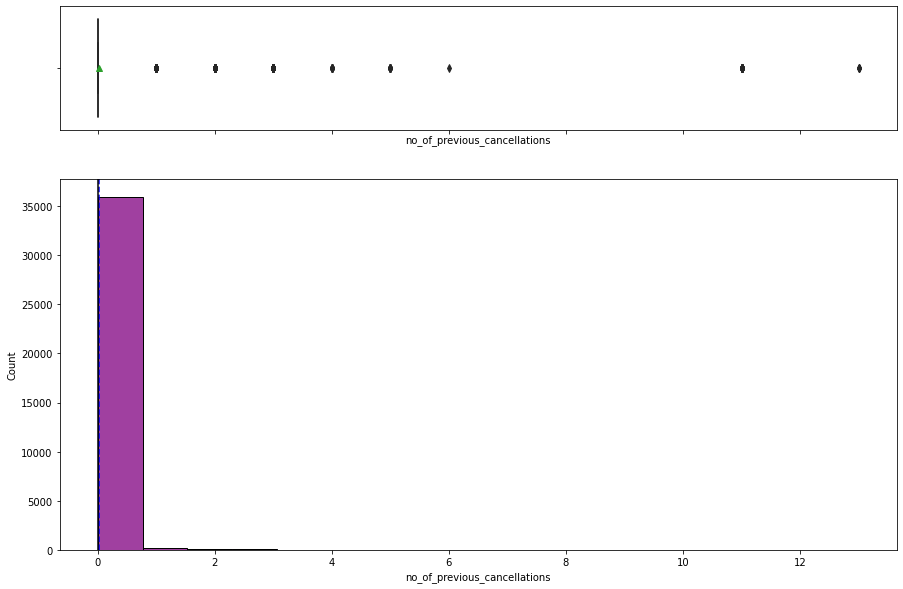

In [ ]:
histogram_boxplot(df,"no_of_previous_cancellations")

**Observations:**
-  Most of the data is concentrated around 0 and 1 cancellations. 
* There are a few outliers above the upper quartile of 13 cancellations.

### <font color='purple'>**Previous Booking not Canceled**</font>

In [ ]:
# We will create the boxplot to get the summary of the variable, and also run a histplot to see the distribution of the values:
print('Sample Mean =',df['no_of_previous_bookings_not_canceled'].mean())
print('Sample Minimum =',df['no_of_previous_bookings_not_canceled'].min())
print('Sample Maximum =',df['no_of_previous_bookings_not_canceled'].max())
plt.show()

Sample Mean = 0.15341144038594073
Sample Minimum = 0
Sample Maximum = 58


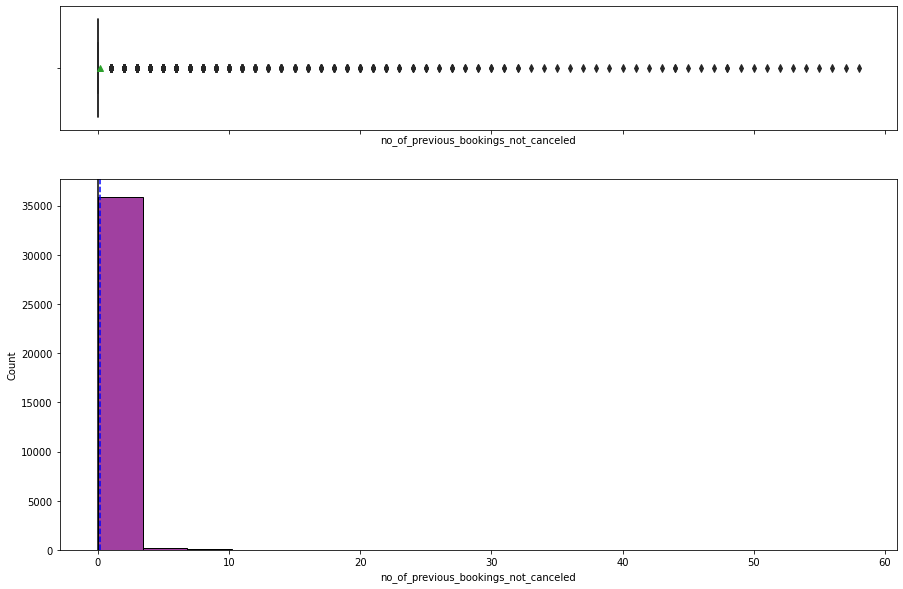

In [ ]:
histogram_boxplot(df,"no_of_previous_bookings_not_canceled")

**Observations:**
-  Most of the data is concentrated around 0 and 1. 
* There are quite a few outliers above the upper quartile of 58 bookings not cancelled.

### <font color='purple'>**Number of Adults**</font>

In [ ]:
# We will create the barplot to see the distribution of the categorical variable:
print('Sample Mean =',df['no_of_adults'].mean())
print('Sample Minimum =',df['no_of_adults'].min())
print('Sample Maximum =',df['no_of_adults'].max())
plt.show()

Sample Mean = 1.8449620951068229
Sample Minimum = 0
Sample Maximum = 4


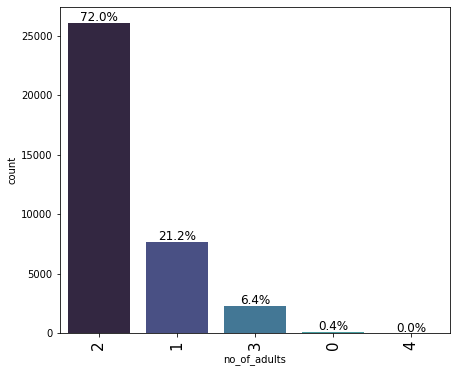

In [ ]:
labeled_barplot(df, "no_of_adults", perc=True)

**Observations:**
- 72% of bookings have 2 adults. 21% 1 adult and 6% 3 adults per booking.

### <font color='purple'>**Number of Children**</font>

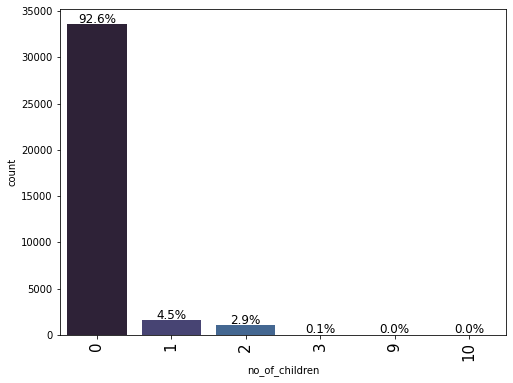

In [ ]:
labeled_barplot(df, "no_of_children", perc=True)

**Observations:**
- We can observe that over 92% of the bookings do not have children. Only 4.5% have 1 kid and around 3% have 2 kids.

In [ ]:
# We see that there are some values with 9 and 10 children. Let's see how many we have:
df[df["no_of_children"]>3]

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
6338,INN06339,2,10,0,2,Meal Plan 1,0,Room_Type 4,37,2018,1,12,Online,0,0,0,84.45000,1,Not_Canceled
10041,INN10042,1,9,2,1,Meal Plan 1,0,Room_Type 1,11,2017,10,11,Corporate,0,0,0,95.00000,0,Not_Canceled
10061,INN10062,2,9,2,5,Meal Plan 1,0,Room_Type 2,8,2017,8,13,Online,0,0,0,76.50000,1,Canceled


In [ ]:
# We will replace 9, and 10 children with 3
df["no_of_children"] = df["no_of_children"].replace([9, 10], 3)

### <font color='purple'>**Number of Week Nights**</font>

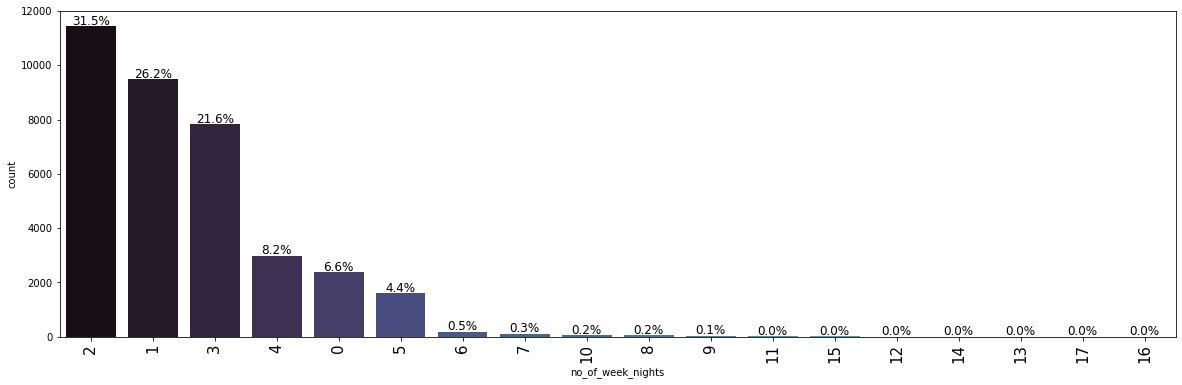

In [ ]:
labeled_barplot(df, "no_of_week_nights", perc=True)

**Observations:**
 - We can see that 31% of the bookings during the week are for 2 nights; 26% 1 night and 21% of bookings are 3 nights. 
 - Around 20%-25% of the bookings are spread around 0 to 16 nights during the week days. 

### <font color='purple'>**Number of Weekend Nights**</font>

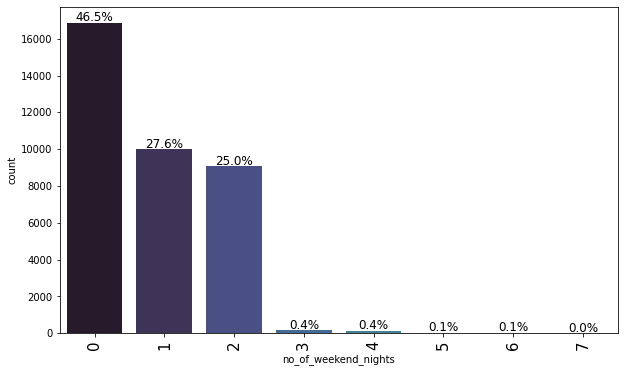

In [ ]:
labeled_barplot(df, "no_of_weekend_nights", perc=True)

**Observations:**
- 46.5% of the bookings are not for weekend nights.27% of the bookings have 1 weekend night and 25% have 2 weekend night bookings.

### <font color='purple'>**Required Car Parking Space**</font>

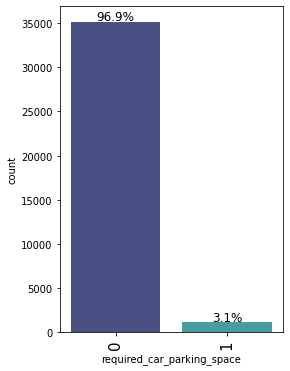

In [ ]:
labeled_barplot(df, "required_car_parking_space", perc=True)

**Observations:**
 - Only 3% of the customers required a parking space.

### <font color='purple'>**Type of Meal Plan**</font>

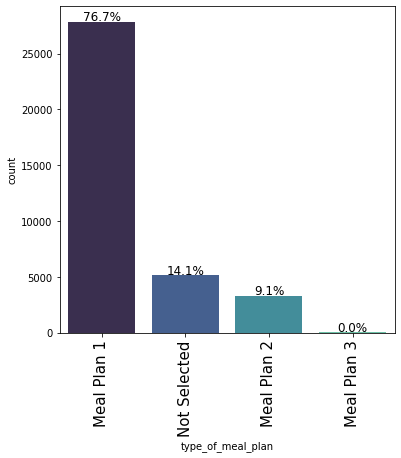

In [ ]:
labeled_barplot(df, "type_of_meal_plan", perc=True)


**Observations:**
- 76% of the customers selected Meal Plan 1. 14% did not select a meal plan. Meal Plan 3 has the least preference among the customers.

### <font color='purple'>**Room Type Reserved**</font>

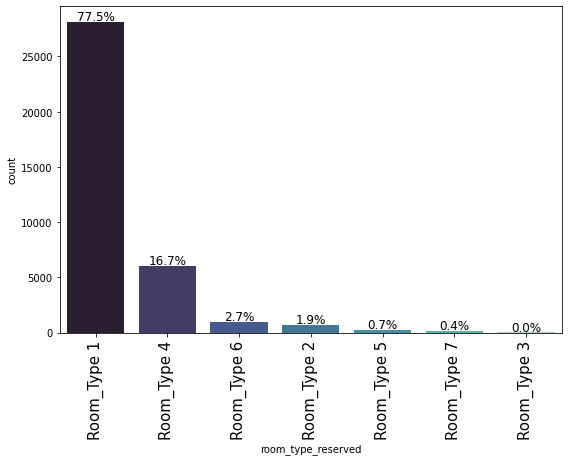

In [ ]:
labeled_barplot(df, "room_type_reserved", perc=True)

**Observations:**
- Room Type 1 is the most popular among customers, 77.5% of bookings preferred this room. Room type 4 is the next popular room with 16.7% of the booking preferences. 

### <font color='purple'>**Arrival Month**</font>

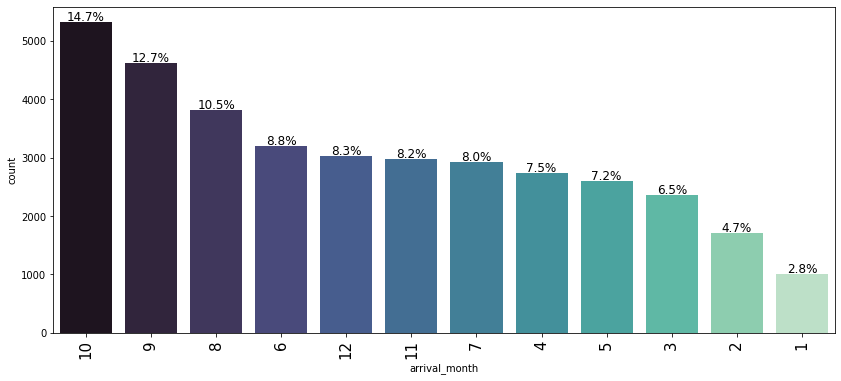

In [ ]:
labeled_barplot(df, "arrival_month", perc=True)

**Observations:**
- October (10) 14%, September (9) 12%, and August (8) 10% are the three months with highest arrivals. The rest of the months have even distribution of arrivals.


### <font color='purple'>**Market Segment Type**</font>

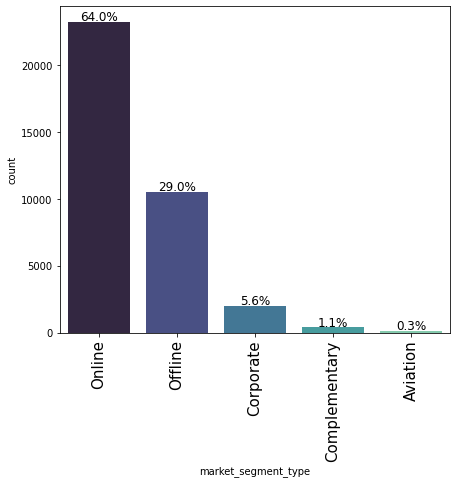

In [ ]:
labeled_barplot(df, "market_segment_type", perc=True)

**Observations:**
- It is clearly observed that online booking has the 64% of the market segment. Offline segment is the next type with 29% used for bookings by customers.

### <font color='purple'>**Special Requests**</font>

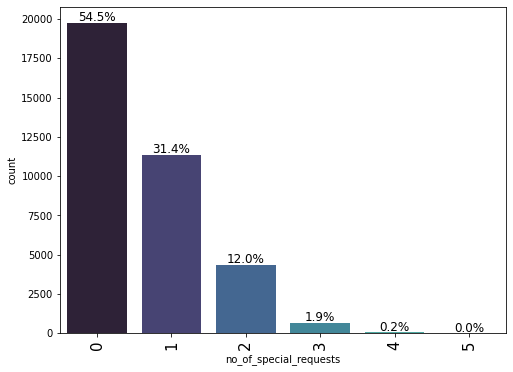

In [ ]:
labeled_barplot(df, "no_of_special_requests", perc=True)

**Observations:**
- 54% of the customers did not have any special requests. 31% had one request during the booking process.

### <font color='purple'>**Booking Status**</font>


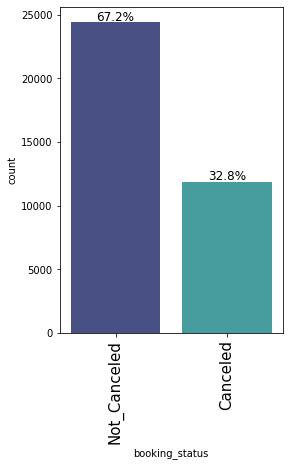

In [ ]:
labeled_barplot(df, "booking_status", perc=True)

**Observations:**
- 32% of the bookings were cancelled by the customers.

## **Bivariate Analysis**

---



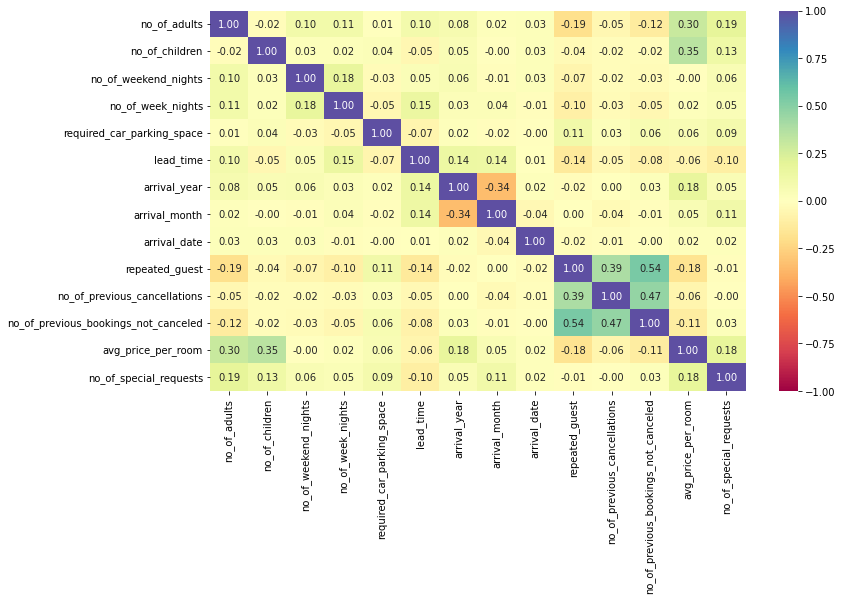

In [ ]:
cols_list = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(
    df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

**Observations:**
- It is interesting to see that repeated guests and cancellations (0.39) and non cancellations (0.54) are positively correlated. 
- Number of adults and children are also positively correlated with the average room price.
- Special requests are also positively related to the number of adults and childre.
- The highest negative correlation exists between arrival month and arrival year/date.

**We will create functions that will help us with further analysis.**

In [ ]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [ ]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

### <font color='purple'>**Hotel rates are dynamic and change according to demand and customer demographics. Let's see how prices vary across different market segments**</font>

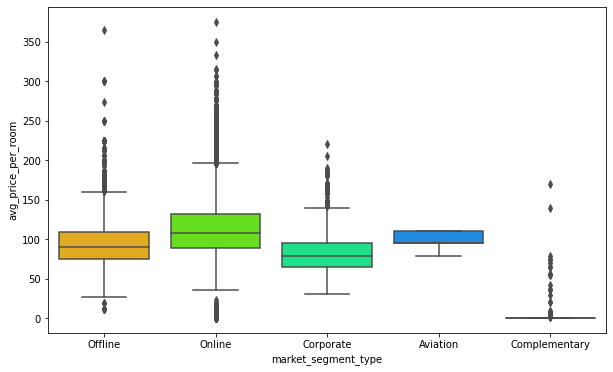

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df, x="market_segment_type", y="avg_price_per_room", palette="gist_rainbow"
)
plt.show()

**Observations:**
- We observe that average prices are not very different in different market segments. The average price for corporate market segment has relatively lower average price.
- Online market has more outlier prices below and above the lower/upper whiskers, maybe depending on which online platform customers use.
- Aviation market segment has the highest minimum and average price per room.
- As expected, complementary price has the lowest, close to zero, pricing, with some outliers that are still below the average prices of the other market segments.  

### <font color='purple'>**Let's see how booking status varies across different market segments.**</font>

booking_status       Canceled  Not_Canceled    All
market_segment_type                               
All                     11885         24390  36275
Online                   8475         14739  23214
Offline                  3153          7375  10528
Corporate                 220          1797   2017
Aviation                   37            88    125
Complementary               0           391    391
------------------------------------------------------------------------------------------------------------------------


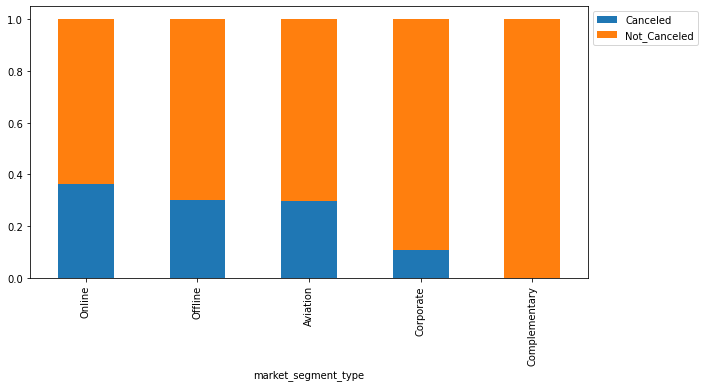

In [ ]:
stacked_barplot(df, "market_segment_type", "booking_status")

**Observations:**
- We see that online market segment has the highest cancelled and not cancelled rate, the expected outcome as it is the most preferred segment type. The higher cancellation rates follow by offline and aviation segments.  
- It is important to note that corporate market segment has the lowest cancellation rate, if the completementary is not counted with the 0 cancellation rate. 

### <font color='purple'>**Let's check how average price per room impacts booking status**</font>

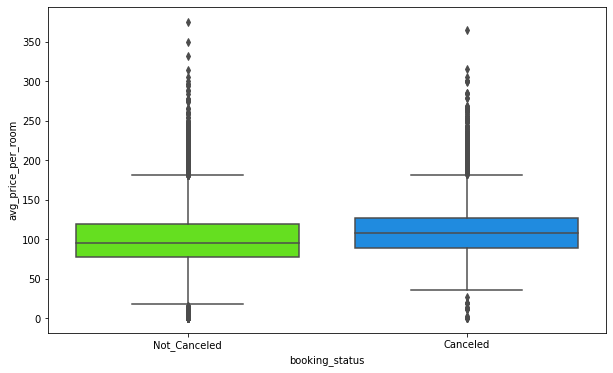

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df, x="booking_status", y="avg_price_per_room", palette="gist_rainbow"
)
plt.show()

**Observations:**
- There is a slight correlation between the cancelled bookings and the prices. The average room price for cancelled bookings is slightly higher.  Both booking statuses have outliers below and above the minimum and maximum rates. 

### <font color='purple'>**Many guests have special requirements when booking a hotel room. Let's see how it impacts cancellations**</font>

no_of_previous_cancellations      0    1   2   3   4   5  6  11  13    All
no_of_special_requests                                                    
2                              4347    4   1   2   1   7  1   1   0   4364
All                           35937  198  46  43  10  11  1  25   4  36275
0                             19553  153  25  28   3   3  0   8   4  19777
1                             11284   39  14  13   6   1  0  16   0  11373
3                               668    1   6   0   0   0  0   0   0    675
4                                77    1   0   0   0   0  0   0   0     78
5                                 8    0   0   0   0   0  0   0   0      8
------------------------------------------------------------------------------------------------------------------------


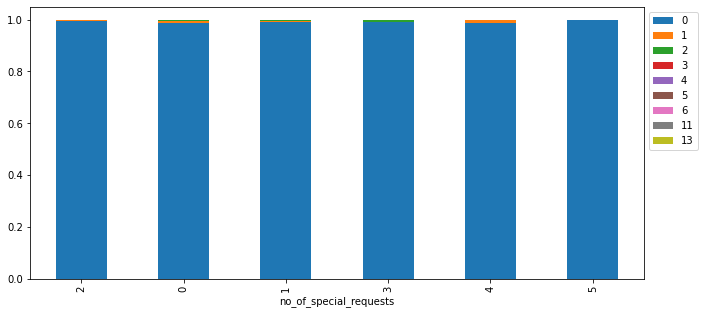

In [ ]:
stacked_barplot(df, "no_of_special_requests", "no_of_previous_cancellations")

**Observations:**
- We can observe that special request does not have a high cancellation rates. Most of the cancellations are correlated with 1 special request bookings. There are a few cancellations with 3 and 4 special request bookings.

### <font color='purple'>**Let's see if the special requests made by the customers impacts the prices of a room**</font>

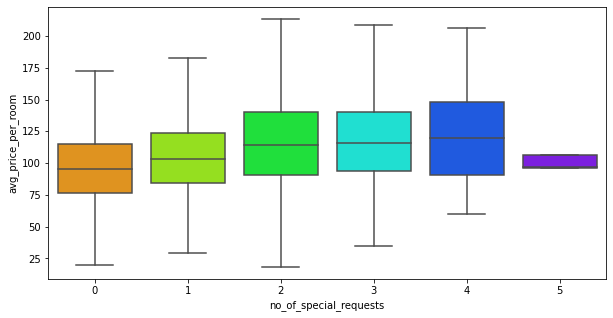

In [ ]:
## We will complete the code to create boxplot for no of special requests and average price per room (excluding the outliers)
plt.figure(figsize=(10, 5))
sns.boxplot(
    data=df, x="no_of_special_requests", y="avg_price_per_room", palette="gist_rainbow",showfliers = False
)  
plt.show()

**Observations:**
- We can see that the average number of special requests slightly rises with the average price per room.

### <font color='purple'>**We saw earlier that there is a positive correlation between booking status and average price per room. Let's analyze it.**</font>


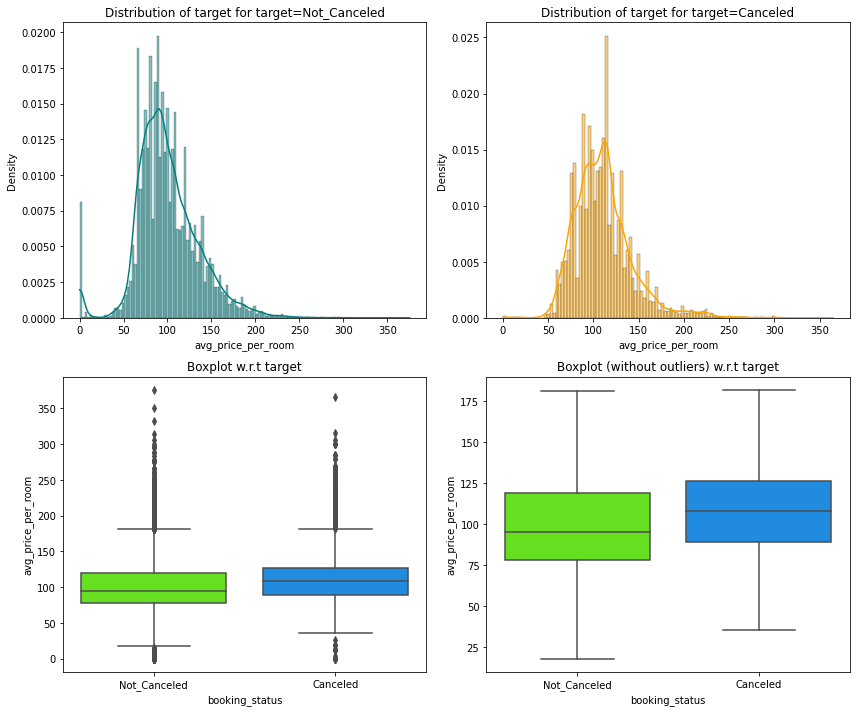

In [ ]:
distribution_plot_wrt_target(df, "avg_price_per_room", "booking_status")

**Observations:**
- From the distribution of the cancelled and not cancelled bookings we can see that both statuses have a normal distribution, with a concentration on the statuses on about 100 euros.
- The minimum price of the cancelled bookings (27) is higher than the not cancelled bookings (20-22).


### <font color='purple'>**There is a positive correlation between booking status and lead time also. Let's analyze it further.**</font>

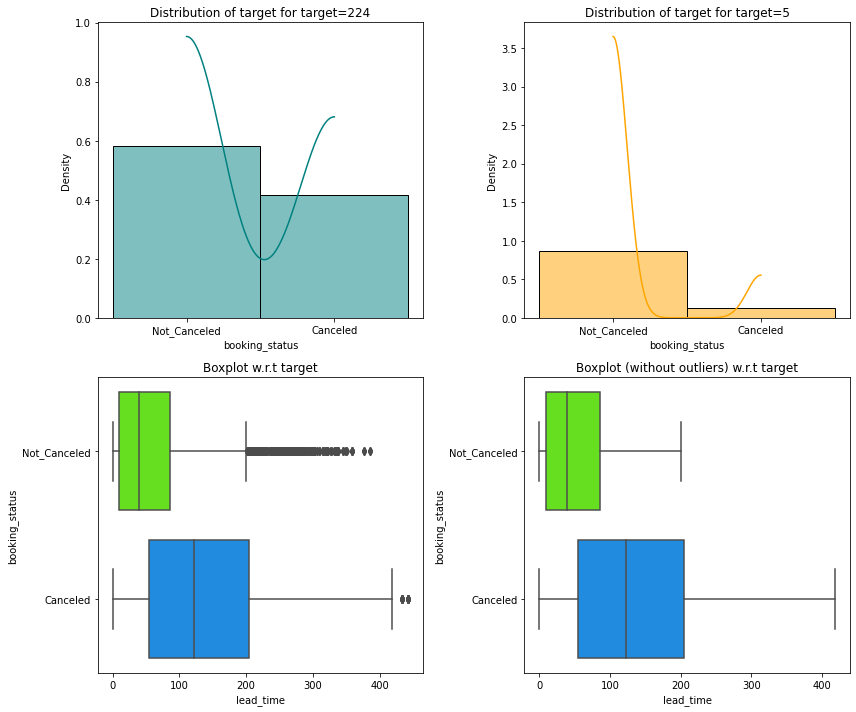

In [ ]:
distribution_plot_wrt_target(df, "booking_status", "lead_time")

**Observations:**
- We can observe that longer the lead time there are more cancellations, while not-cancelled bookings have a lot of outliers above the max lead time.
- The 75th
 quartile of the lead time for not-cancelled bookings are almost equal to the average lead time of the cancelled bookings.
- The 75th quartile of the cancelled bookings lead time is close to the maximum lead time of the not-cancelled bookings. 

### <font color='purple'>**Generally people travel with their spouse and children for vacations or other activities. Let's create a new dataframe of the customers who traveled with their families and analyze the impact on booking status.**</font>

In [ ]:
# Let's see how many rooms will be included in a family dataframe:
family_data = df[(df["no_of_children"] >= 0) & (df["no_of_adults"] > 1)]
family_data.shape

(28441, 19)

In [ ]:
# Let's create a dataframe which represents a family: more than one adult and have children.
family_data["no_of_family_members"] = (
    family_data["no_of_adults"] + family_data["no_of_children"]
)

booking_status        Canceled  Not_Canceled    All
no_of_family_members                               
All                       9985         18456  28441
2                         8213         15506  23719
3                         1368          2425   3793
4                          398           514    912
5                            6            11     17
------------------------------------------------------------------------------------------------------------------------


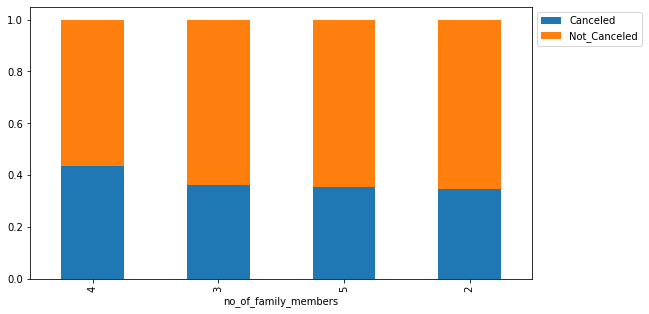

In [ ]:
#Let's create a barplot that shows the relationship between number of family members and booking status:
stacked_barplot(family_data,"no_of_family_members","booking_status")

**Observations:**
- We can say that the number of family members are not very different by the cancellation rates.In general, for the customers with families, the not-cancelled bookings are at a higher rate than the cancelled bookings.

### <font color='purple'>**Let's do a similar analysis for the customer who stay for at least a day at the hotel.**</font>

In [ ]:
#Let's see how many rows there are in total with more than 0 week and weekend nights:
total_days = df[(df["no_of_week_nights"] > 0) & (df["no_of_weekend_nights"] > 0)]
total_days.shape

(17094, 19)

In [ ]:
total_days["total_days"] = (
    total_days["no_of_week_nights"] + total_days["no_of_weekend_nights"]
)

booking_status  Canceled  Not_Canceled    All
total_days                                   
All                 6115         10979  17094
3                   2183          3689   5872
4                   1387          2977   4364
5                    738          1593   2331
2                    639          1301   1940
6                    465           566   1031
7                    383           590    973
8                     79           100    179
10                    58            51    109
9                     53            58    111
14                    27             5     32
15                    26             5     31
13                    15             3     18
12                    15             9     24
11                    15            24     39
20                     8             3     11
19                     5             1      6
16                     5             1      6
17                     4             1      5
18                     3          

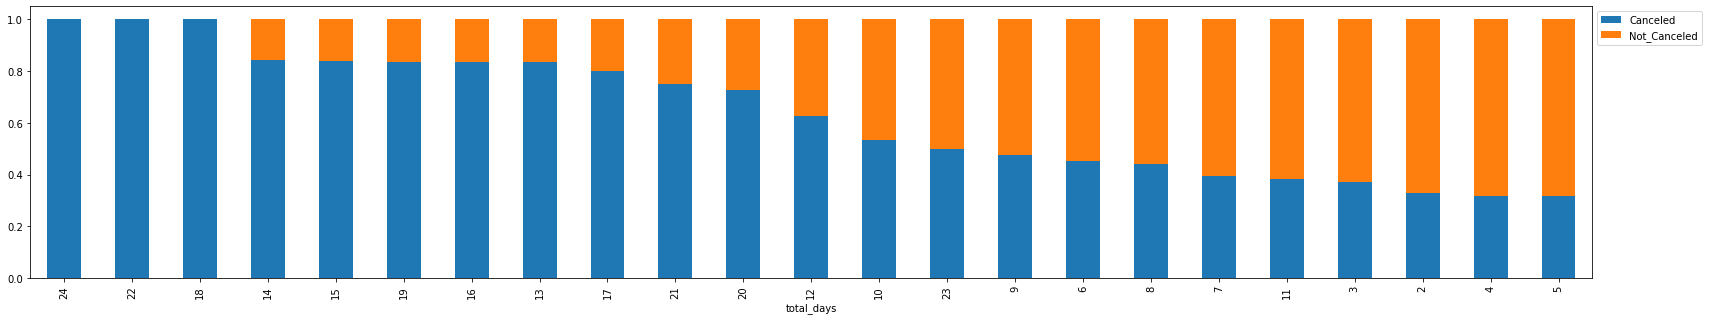

In [ ]:
#Let's create a barplot that shows the relationship between stay of at least one day and booking status:
stacked_barplot(total_days,"total_days","booking_status")

**Observations:**
- We can see that shorter stays have less cancellations than longer stays
- Bookings with 18, 22, and 24 days have all been cancelled. 

### <font color='purple'>**Repeating guests are the guests who stay in the hotel often and are important to brand equity. Let's see what percentage of repeating guests cancel?**</font>

no_of_previous_cancellations      0    1   2   3   4   5  6  11  13    All
repeated_guest                                                            
1                               592  198  46  43  10  11  1  25   4    930
All                           35937  198  46  43  10  11  1  25   4  36275
0                             35345    0   0   0   0   0  0   0   0  35345
------------------------------------------------------------------------------------------------------------------------


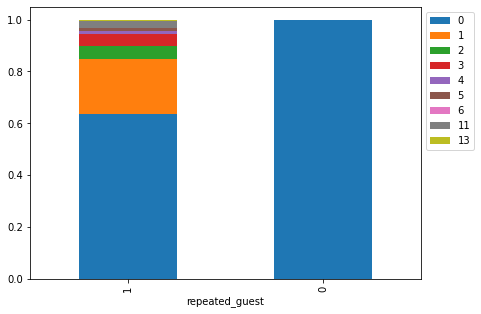

In [ ]:
stacked_barplot(df, "repeated_guest", "no_of_previous_cancellations")

**Observations:**
- More than 60% of the repeated guests have 0 previous cancellations. Around 35% of them have 1 or more previous cancellations.

### <font color='purple'>**Let's find out what are the busiest months in the hotel.**</font>

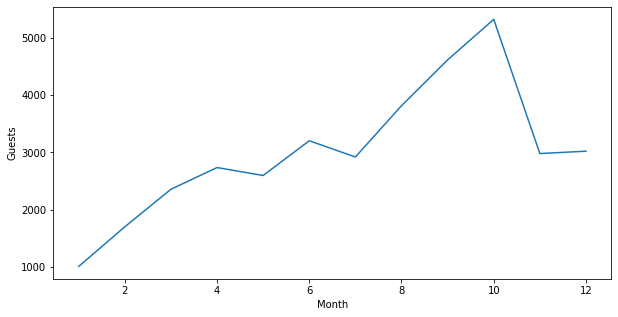

In [ ]:
# Let's group the data on arrival months and extracting the count of bookings
monthly_data = df.groupby(["arrival_month"])["booking_status"].count()

# Let's create a dataframe with months and count of customers in each month
monthly_data = pd.DataFrame(
    {"Month": list(monthly_data.index), "Guests": list(monthly_data.values)}
)

# Now we need to plot the trend over different months
plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_data, x="Month", y="Guests")
plt.show()

**Observations:**
- The line plot shows that winter months have the least booking numbers. The guests considerably increase closer to august, with a peak month being September and October. 

### <font color='purple'>**Let's check the rate of bookings cancelled in each month.**</font>

booking_status  Canceled  Not_Canceled    All
arrival_month                                
All                11885         24390  36275
10                  1880          3437   5317
9                   1538          3073   4611
8                   1488          2325   3813
7                   1314          1606   2920
6                   1291          1912   3203
4                    995          1741   2736
5                    948          1650   2598
11                   875          2105   2980
3                    700          1658   2358
2                    430          1274   1704
12                   402          2619   3021
1                     24           990   1014
------------------------------------------------------------------------------------------------------------------------


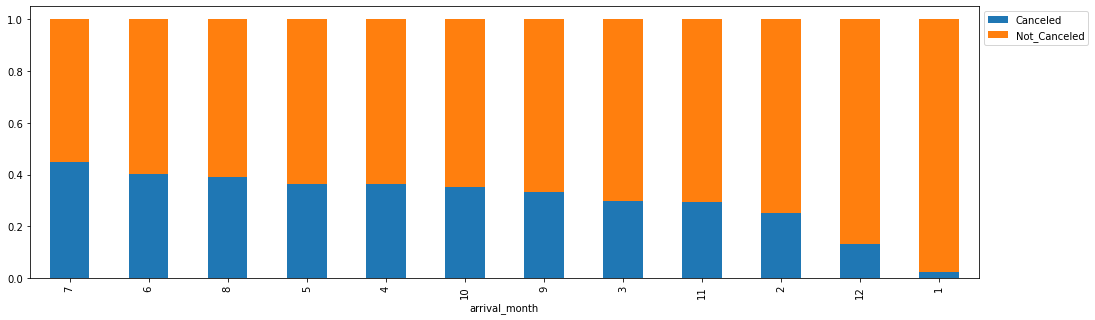

In [ ]:
stacked_barplot(df, "arrival_month","booking_status")

**Observations:**
- We can see that summer months have higher cancellations than fall and winter.January has the least number of cancellations, followed by December and February.


### <font color='purple'>**As hotel room prices are dynamic, Let's see how the prices vary across different months.**</font>

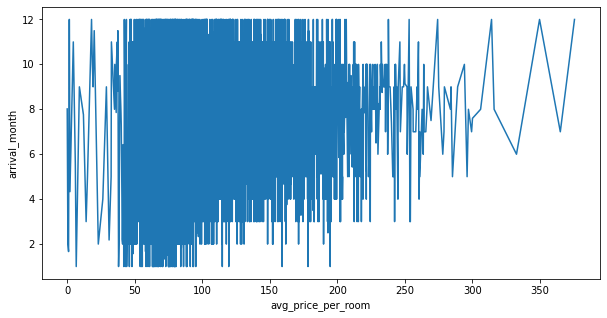

In [ ]:
# We will create lineplot between average price per room and arrival month:
plt.show()
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x='avg_price_per_room', y='arrival_month', ci=False)  

**Observations:**
- We can see that there is a high concentration of the average price between 50 and 100 euros across the months. 
- Higher prices per room are mainly common in the busy months: 8, 10 , 12.

## **Reflections on Analysis:**

1. What are the busiest months in the hotel? - The guests considerably increase closer to August, with a peak month being September and October. 
2. Which market segment do most of the guests come from?- Online booking has the highest 64% of the market segment. Offline segment is the next type with 29% used for bookings by customers.
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?- We observe that average prices are not very different in different market segments. The average price for corporate market segment has relatively lower average price.Online market has more outlier prices below and above the lower/upper whiskers, maybe depending on which online platform customers use.Aviation market segment has the highest minimum and average price per room.
4. What percentage of bookings are canceled? - 32% of the bookings are cancelled.
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel? - Apporoximately 35% of the repeated guests cancel their booking, with more than 60% having no history of booking cancellations.
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?- Special request does not have much impact on the cancellation rates. Most of the cancellations are correlated with 1 special request bookings. There are a few cancellations with 3 and 4 special request bookings.

# **Data Preprocessing**

---


- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

### <font color='purple'>**Checking for Missing Values**</font>

In [ ]:
df.info()# by running this formula we can double check the data types for assurance.
df.isnull().sum()# this formula will help us see how many columns have missing data.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

**Observations:**
- Based on the outcomes, there are not missing values in the dataset.


### <font color='purple'>**Outlier Check**</font>

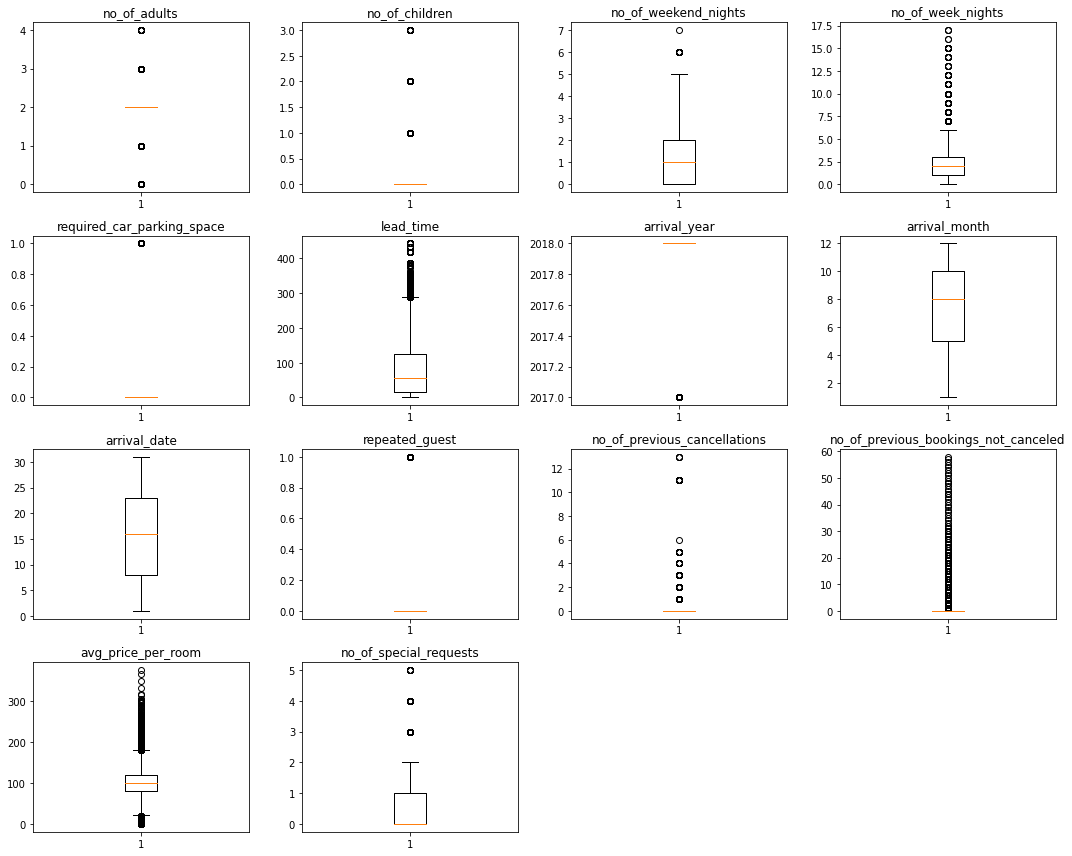

In [ ]:
# outlier detection using boxplot
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

**Observations:**
* There are quite a few outliers in the data.
* However, we will not treat them as they are proper values.


### <font color='purple'>**Data Engineering**</font>

**Let's look again into the general datatype review:**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

**Let's drop Booking ID column, as it does not give any context to the dataset.**

In [ ]:
df.drop(["Booking_ID"], axis=1, inplace=True)

**There are several object datatypes. Let's convert them into categorical variables.**

In [ ]:
# Loop through all columns in the dataframe:
for feature in df.columns: 
    if df[feature].dtype == 'object': # Only applies for columns with categorical strings
        df[feature] = pd.Categorical(df[feature]) # Let's replace strings with an integer
df.head(10)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00000,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68000,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00000,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00000,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50000,0,Canceled
5,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,2018,9,13,Online,0,0,0,115.00000,1,Canceled
6,2,0,1,3,Meal Plan 1,0,Room_Type 1,34,2017,10,15,Online,0,0,0,107.55000,1,Not_Canceled
7,2,0,1,3,Meal Plan 1,0,Room_Type 4,83,2018,12,26,Online,0,0,0,105.61000,1,Not_Canceled
8,3,0,0,4,Meal Plan 1,0,Room_Type 1,121,2018,7,6,Offline,0,0,0,96.90000,1,Not_Canceled
9,2,0,0,5,Meal Plan 1,0,Room_Type 4,44,2018,10,18,Online,0,0,0,133.44000,3,Not_Canceled


In [ ]:
# Let's see the types of categorical values to decide how we will treat them:
print(df.type_of_meal_plan.value_counts())
print(df.room_type_reserved.value_counts())
print(df.market_segment_type.value_counts())
print(df.booking_status.value_counts())
print(df.avg_price_per_room.value_counts())

Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: type_of_meal_plan, dtype: int64
Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: room_type_reserved, dtype: int64
Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: market_segment_type, dtype: int64
Not_Canceled    24390
Canceled        11885
Name: booking_status, dtype: int64
65.00000     848
75.00000     826
90.00000     703
95.00000     669
115.00000    662
            ... 
212.42000      1
83.48000       1
70.42000       1
130.99000      1
167.80000      1
Name: avg_price_per_room, Length: 3930, dtype: int64


In [ ]:
# We will replace the categorical values with numeric values:
drop_first = True
replaceStruct = {
                "type_of_meal_plan":  {"Meal Plan 1": 1, "Not Selected": 0 ,"Meal Plan 2": 2 ,"Meal Plan 3":3},
                "room_type_reserved": {"Room_Type 1": 1, "Room_Type 2":2 , "Room_Type 3": 3, "Room_Type 4": 4,"Room_Type 5": 5,"Room_Type 6": 6,"Room_Type 7": 7},
                "market_segment_type": {"Online": 1, "Offline":2 , "Corporate": 3, "Complementary": 4,"Aviation": 5}
                  }
df["booking_status"] = df["booking_status"].apply(
    lambda x: 1 if x == "Canceled" else 0
)

In [ ]:
# Let's check how our data looks now:
df=df.replace(replaceStruct)
df.head(10)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,1,0,1,224,2017,10,2,2,0,0,0,65.00000,0,0
1,2,0,2,3,0,0,1,5,2018,11,6,1,0,0,0,106.68000,1,0
2,1,0,2,1,1,0,1,1,2018,2,28,1,0,0,0,60.00000,0,1
3,2,0,0,2,1,0,1,211,2018,5,20,1,0,0,0,100.00000,0,1
4,2,0,1,1,0,0,1,48,2018,4,11,1,0,0,0,94.50000,0,1
5,2,0,0,2,2,0,1,346,2018,9,13,1,0,0,0,115.00000,1,1
6,2,0,1,3,1,0,1,34,2017,10,15,1,0,0,0,107.55000,1,0
7,2,0,1,3,1,0,4,83,2018,12,26,1,0,0,0,105.61000,1,0
8,3,0,0,4,1,0,1,121,2018,7,6,2,0,0,0,96.90000,1,0
9,2,0,0,5,1,0,4,44,2018,10,18,1,0,0,0,133.44000,3,0


**Observations:**
 - We see that all the variables are numeric and/or categorical values and we have our dataset ready for model building and analysis process.

# **Exploratory Data Analysis (EDA)-2**

---





- It is important that we run EDA one more time after we changed certain features in the dataset.

## **Univariate Analysis**

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="purple"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins,color="purple"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2,color="purple"
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="blue", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="mako",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### <font color='purple'>**Lead Time**</font>

In [ ]:
# We will create the boxplot to get the summary of the variable, and also run a histplot to see the distribution of the values:
print('Sample Mean =',df['lead_time'].mean())
print('Sample Minimum =',df['lead_time'].min())
print('Sample Maximum =',df['lead_time'].max())
plt.show()

Sample Mean = 85.23255685733976
Sample Minimum = 0
Sample Maximum = 443


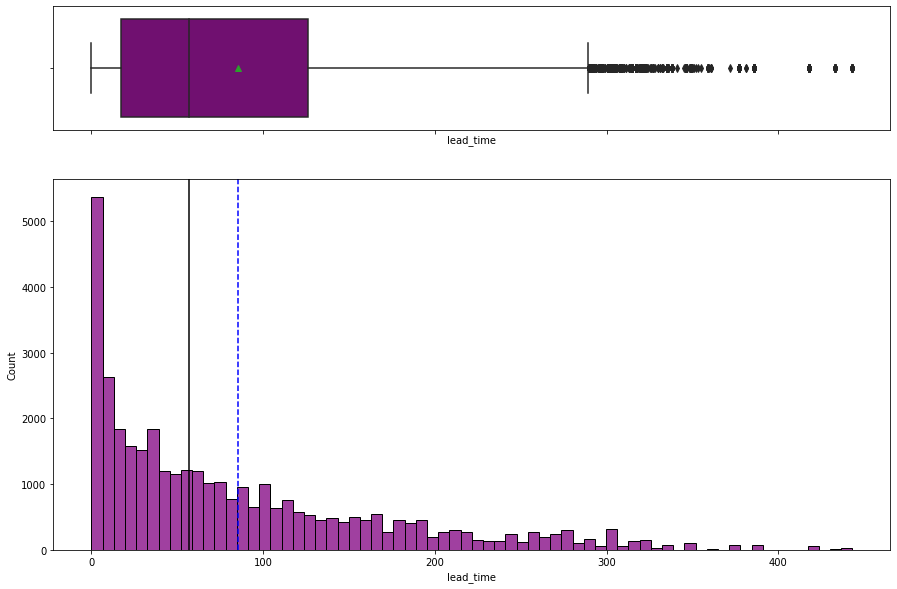

In [ ]:
histogram_boxplot(df, "lead_time")

**Observations:**

* The lead time variable is right skewed with many outliers on the upper quartile.
* There are many rooms booked more than 443 days prior to arrival.

### <font color='purple'>**Price per Room**</font>

In [ ]:
# We will create the boxplot to get the summary of the variable, and also run a histplot to see the distribution of the values:
print('Sample Mean =',df['avg_price_per_room'].mean())
print('Sample Minimum =',df['avg_price_per_room'].min())
print('Sample Maximum =',df['avg_price_per_room'].max())
plt.show()

Sample Mean = 103.41360248104755
Sample Minimum = 0.0
Sample Maximum = 375.5


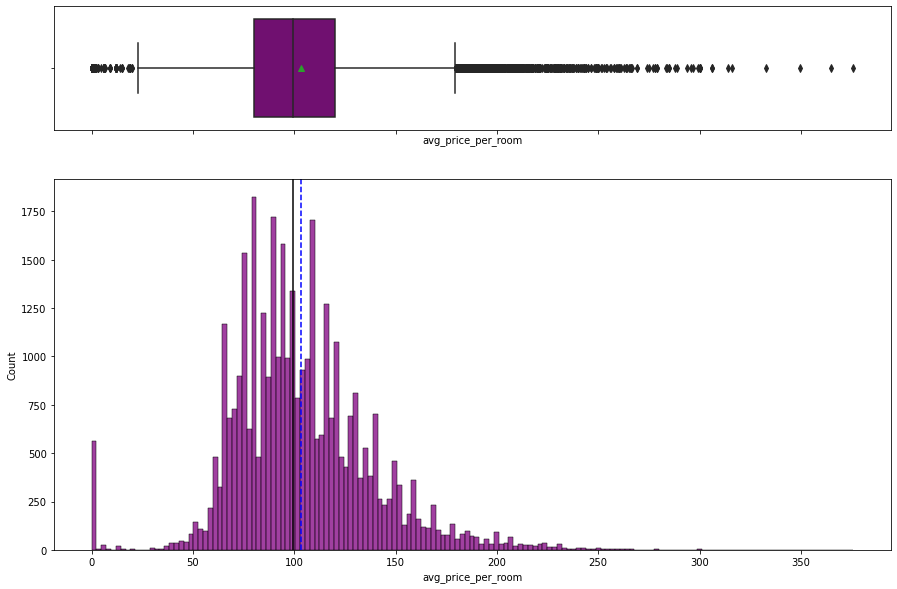

In [ ]:
histogram_boxplot(df, "avg_price_per_room")

**Observations:**
- The average price is considerably normally distributed with outliers present on both whisker sides, especially high on the upper quartile.

In [ ]:
# We noticed that some rooms have 0 average price. Let's see which rows have the 0 average price, were free:
df[df["avg_price_per_room"] == 0]

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
63,1,0,0,1,1,0,1,2,2017,9,10,4,0,0,0,0.00000,1,0
145,1,0,0,2,1,0,1,13,2018,6,1,4,1,3,5,0.00000,1,0
209,1,0,0,0,1,0,1,4,2018,2,27,4,0,0,0,0.00000,1,0
266,1,0,0,2,1,0,1,1,2017,8,12,4,1,0,1,0.00000,1,0
267,1,0,2,1,1,0,1,4,2017,8,23,4,0,0,0,0.00000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35983,1,0,0,1,1,0,7,0,2018,6,7,4,1,4,17,0.00000,1,0
36080,1,0,1,1,1,0,7,0,2018,3,21,4,1,3,15,0.00000,1,0
36114,1,0,0,1,1,0,1,1,2018,3,2,1,0,0,0,0.00000,0,0
36217,2,0,2,1,1,0,2,3,2017,8,9,1,0,0,0,0.00000,2,0


**Observations:**
- We see that 545 bookings were free of charge.

In [ ]:
# Let's check what the market segment was for the free rooms:
df.loc[df["avg_price_per_room"] == 0, "market_segment_type"].value_counts()

4    354
1    191
Name: market_segment_type, dtype: int64

**Observations**:
- It is no surprise that most of the free bookings, 354, were complementary (4). 191 bookings were made online (1).

In [ ]:
# We will replace the outliers in the average price columns with the value of upper whisker. First we need to calculate the value.
# Calculating the 25th quantile
Q1 = df["avg_price_per_room"].quantile(0.25)

# Calculating the 75th quantile
Q3 = df["avg_price_per_room"].quantile(0.75)  
# Calculating IQR
IQR = Q3 - Q1

# Calculating value of upper whisker
Upper_Whisker = Q3 + 1.5 * IQR
Upper_Whisker

179.55

In [ ]:
# assigning the outliers the value of upper whisker
df.loc[df["avg_price_per_room"] >= 500, "avg_price_per_room"] = Upper_Whisker

**Observations:**
- Once we have calculated the interquartile range of the prices and calculated the value of upper whisker, we assigned the outliers equal or above 500 the value of 179.55.


### <font color='purple'>**Previous Booking Cancellations**</font>

In [ ]:
#Let's check the distribution of the booking status:
df['booking_status'].value_counts(normalize=True)

0   0.67236
1   0.32764
Name: booking_status, dtype: float64

In [ ]:
# We will create the boxplot to get the summary of the variable, and also run a histplot to see the distribution of the values:
print('Sample Mean =',df['no_of_previous_cancellations'].mean())
print('Sample Minimum =',df['no_of_previous_cancellations'].min())
print('Sample Maximum =',df['no_of_previous_cancellations'].max())
plt.show()

Sample Mean = 0.023349414197105445
Sample Minimum = 0
Sample Maximum = 13


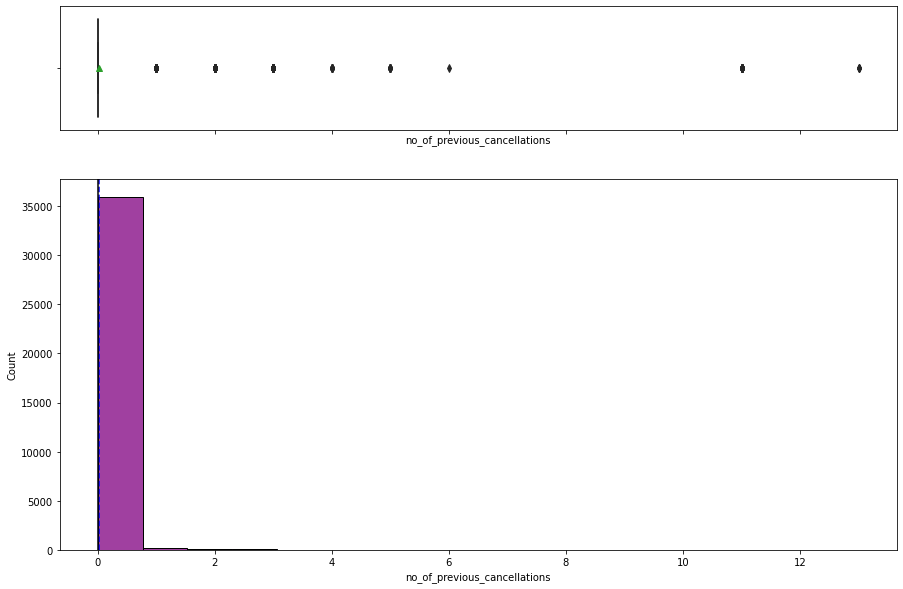

In [ ]:
histogram_boxplot(df,"no_of_previous_cancellations")

**Observations:**
-  Most of the data is concentrated around 0 and 1 cancellations. 
* There are a few outliers above the upper quartile of 13 cancellations.

### <font color='purple'>**Previous Booking not Canceled**</font>

In [ ]:
# We will create the boxplot to get the summary of the variable, and also run a histplot to see the distribution of the values:
print('Sample Mean =',df['no_of_previous_bookings_not_canceled'].mean())
print('Sample Minimum =',df['no_of_previous_bookings_not_canceled'].min())
print('Sample Maximum =',df['no_of_previous_bookings_not_canceled'].max())
plt.show()

Sample Mean = 0.15341144038594073
Sample Minimum = 0
Sample Maximum = 58


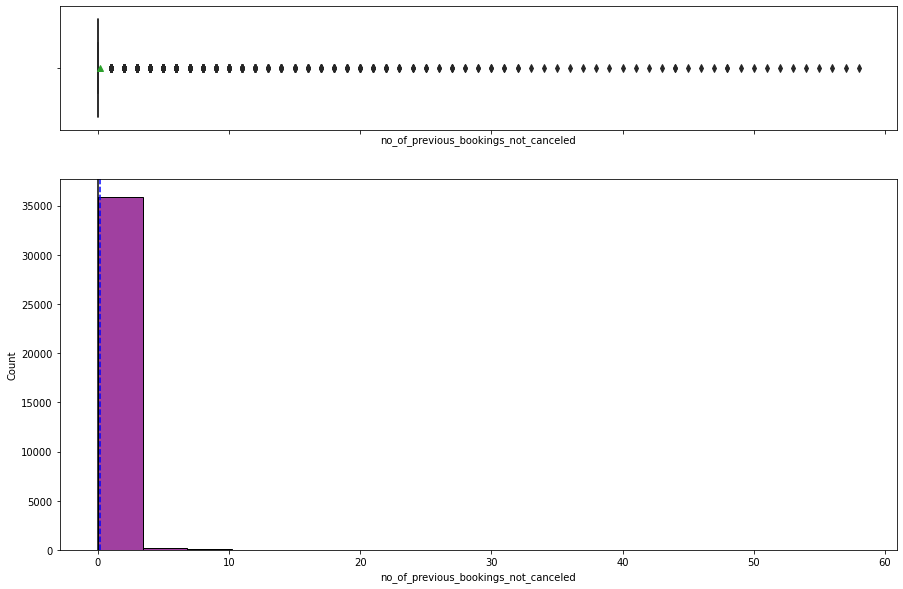

In [ ]:
histogram_boxplot(df,"no_of_previous_bookings_not_canceled")

**Observations:**
-  Most of the data is concentrated around 0 and 1. 
* There are quite a few outliers above the upper quartile of 58 bookings not cancelled.

### <font color='purple'>**Number of Adults**</font>

In [ ]:
# We will create the barplot to see the distribution of the categorical variable:
print('Sample Mean =',df['no_of_adults'].mean())
print('Sample Minimum =',df['no_of_adults'].min())
print('Sample Maximum =',df['no_of_adults'].max())
plt.show()

Sample Mean = 1.8449620951068229
Sample Minimum = 0
Sample Maximum = 4


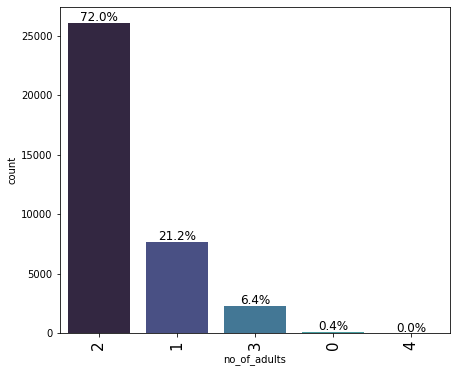

In [ ]:
labeled_barplot(df, "no_of_adults", perc=True)

**Observations:**
- 72% of bookings have 2 adults. 21% 1 adult and 6% 3 adults per booking.

### <font color='purple'>**Number of Children**</font>

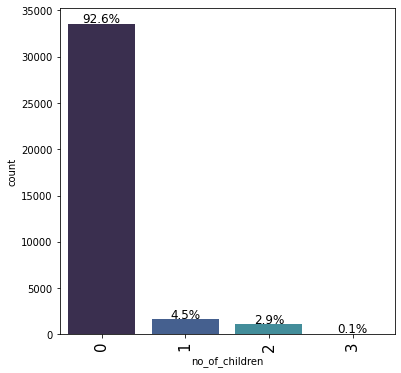

In [ ]:
labeled_barplot(df, "no_of_children", perc=True)

**Observations:**
- We can observe that over 92% of the bookings do not have children. Only 4.5% have 1 kid and around 3% have 2 kids.

In [ ]:
# We see that there are some values with 9 and 10 children. Let's see how many we have:
df[df["no_of_children"]>3]

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status


In [ ]:
# We will replace 9, and 10 children with 3
df["no_of_children"] = df["no_of_children"].replace([9, 10], 3)

### <font color='purple'>**Number of Week Nights**</font>

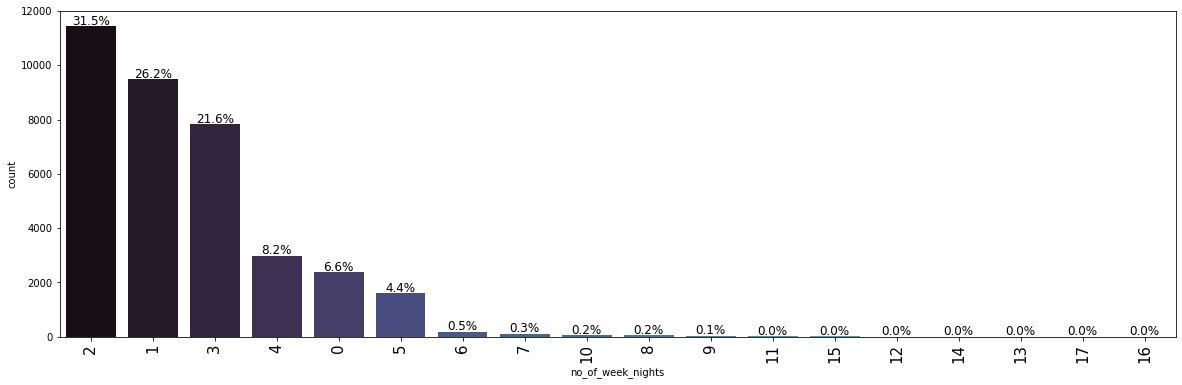

In [ ]:
labeled_barplot(df, "no_of_week_nights", perc=True)

**Observations:**
 - We can see that 31% of the bookings during the week are for 2 nights; 26% 1 night and 21% of bookings are 3 nights. 
 - Around 20%-25% of the bookings are spread around 0 to 16 nights during the week days. 

### <font color='purple'>**Number of Weekend Nights**</font>

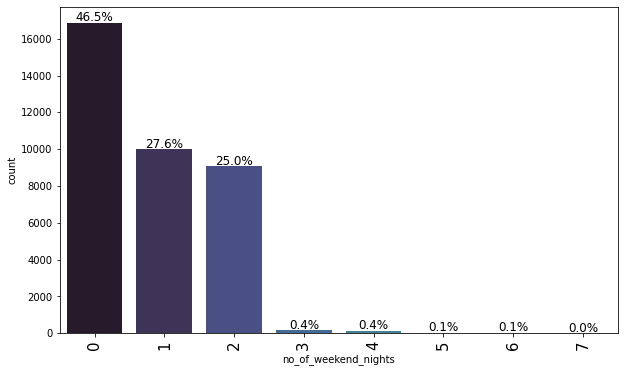

In [ ]:
labeled_barplot(df, "no_of_weekend_nights", perc=True)

**Observations:**
- 46.5% of the bookings are not for weekend nights.27% of the bookings have 1 weekend night and 25% have 2 weekend night bookings.

### <font color='purple'>**Required Car Parking Space**</font>

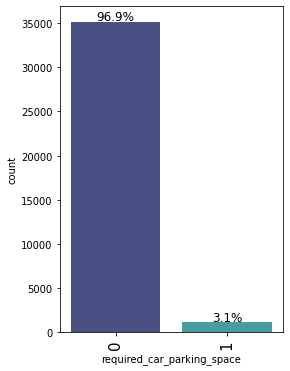

In [ ]:
labeled_barplot(df, "required_car_parking_space", perc=True)

**Observations:**
 - Only 3% of the customers required a parking space.

### <font color='purple'>**Type of Meal Plan**</font>

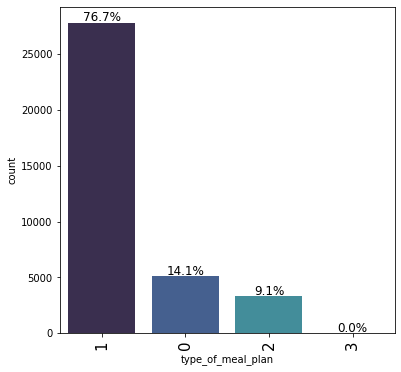

In [ ]:
labeled_barplot(df, "type_of_meal_plan", perc=True)


**Observations:**
- We can see that the meal plans are now coded accordingly.
- 76% of the customers selected Meal Plan 1. 14% did not select a meal plan. Meal Plan 3 has the least preference among the customers.

### <font color='purple'>**Room Type Reserved**</font>

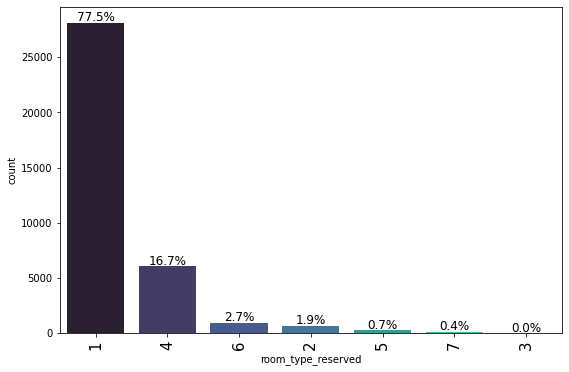

In [ ]:
labeled_barplot(df, "room_type_reserved", perc=True)

**Observations:**
- Room Type 1 (1) is the most popular among customers, 77.5% of bookings preferred this room. Room type 4 (4) is the next popular room with 16.7% of the booking preferences.
- Room types are also coded categorically.
 

### <font color='purple'>**Arrival Month**</font>

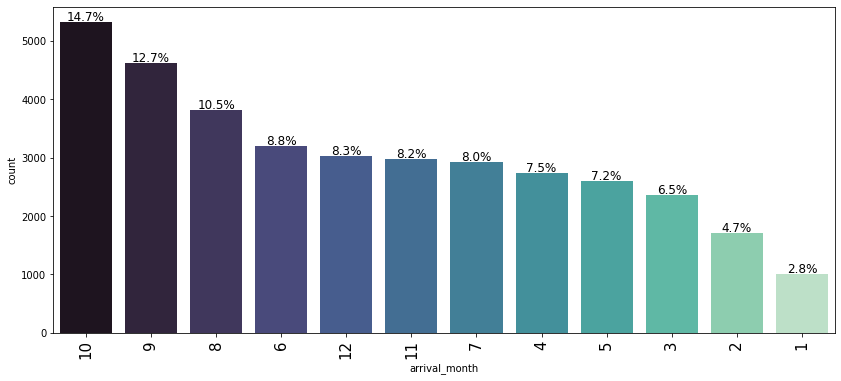

In [ ]:
labeled_barplot(df, "arrival_month", perc=True)

**Observations:**
- October (10) 14%, September (9) 12%, and August (8) 10% are the three months with highest arrivals. The rest of the months have even distribution of arrivals.


### <font color='purple'>**Market Segment Type**</font>

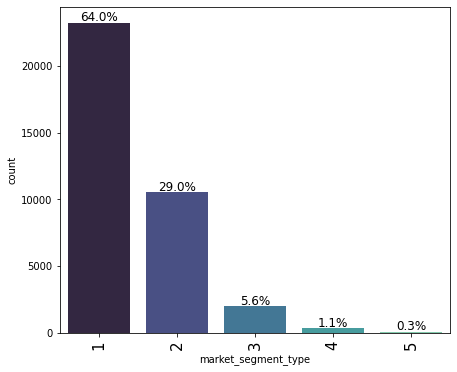

In [ ]:
labeled_barplot(df, "market_segment_type", perc=True)

**Observations:**
- It is clearly observed that online booking (1) has the 64% of the market segment. Offline (2) segment is the next type with 29% used for bookings by customers.

### <font color='purple'>**Special Requests**</font>

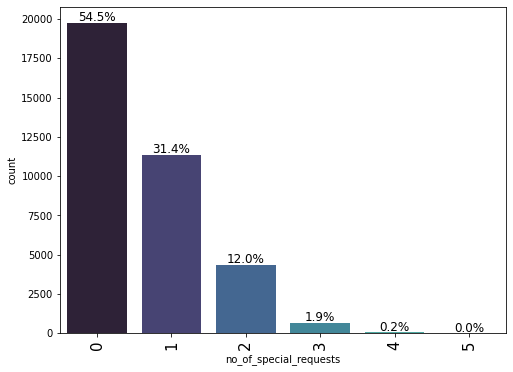

In [ ]:
labeled_barplot(df, "no_of_special_requests", perc=True)

**Observations:**
- 54% of the customers did not have any special requests. 31% had one request during the booking process.

### <font color='purple'>**Booking Status**</font>


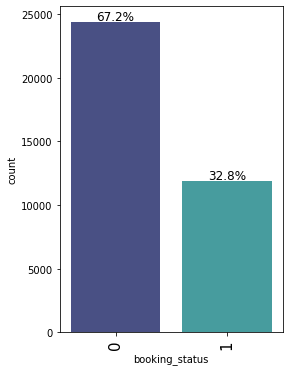

In [ ]:
labeled_barplot(df, "booking_status", perc=True)

**Observations:**
- 32% of the bookings were cancelled (1) by the customers.

## **Bivariate Analysis**

---



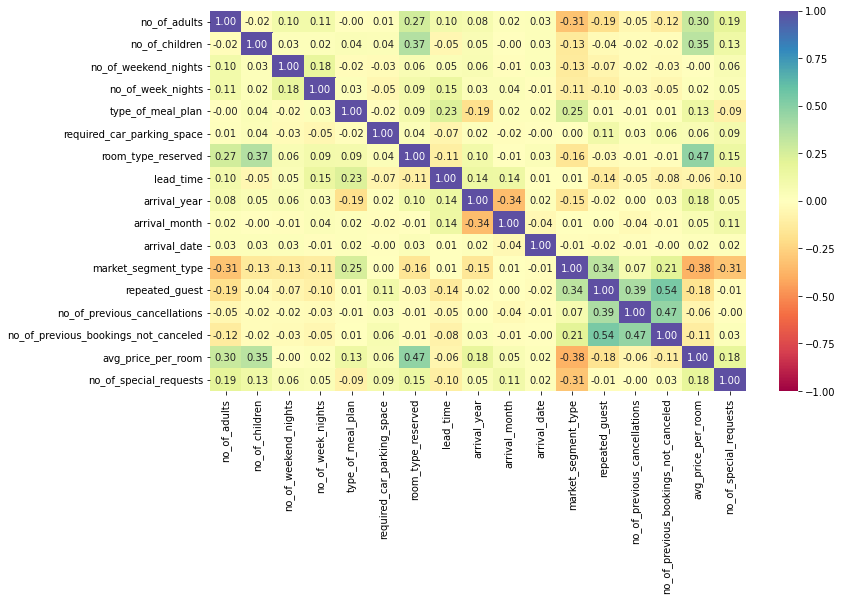

In [ ]:
cols_list = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(
    df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

**Observations:**
- We now see more variables in the heat map after changing the categorical values.
- It is interesting to see that repeated guests and cancellations (0.39) and non cancellations (0.54) are positively correlated. 
- Number of adults and children are also positively correlated with the average room price.
- Special requests are also positively related to the number of adults and childre.
- The highest negative correlation exists between arrival month and arrival year/date.

**We will create functions that will help us with further analysis.**

In [ ]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [ ]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

### <font color='purple'>**Hotel rates are dynamic and change according to demand and customer demographics. Let's see how prices vary across different market segments**</font>

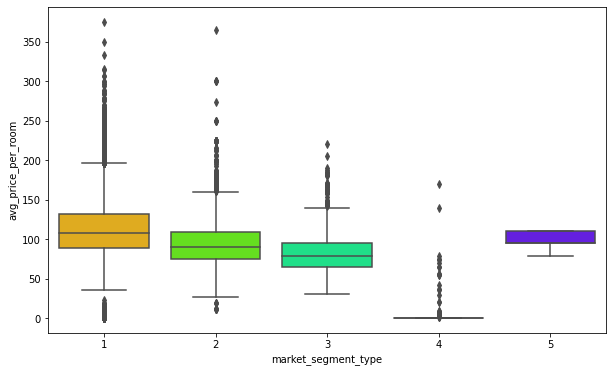

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df, x="market_segment_type", y="avg_price_per_room", palette="gist_rainbow"
)
plt.show()

**Observations:**
- No change after data processing.  

### <font color='purple'>**Let's see how booking status varies across different market segments.**</font>

booking_status           1      0    All
market_segment_type                     
All                  11885  24390  36275
1                     8475  14739  23214
2                     3153   7375  10528
3                      220   1797   2017
5                       37     88    125
4                        0    391    391
------------------------------------------------------------------------------------------------------------------------


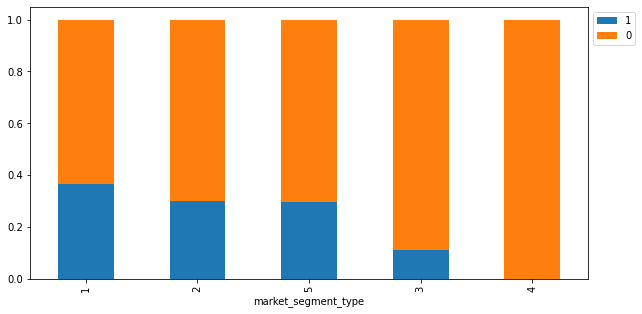

In [ ]:
stacked_barplot(df, "market_segment_type", "booking_status")

**Observations:**
- No change after the data processing.
- We see that online market segment has the highest cancelled and not cancelled rate, the expected outcome as it is the most preferred segment type. The higher cancellation rates follow by offline and aviation segments.  
- It is important to note that corporate market segment has the lowest cancellation rate, if the completementary is not counted with the 0 cancellation rate. 

### <font color='purple'>**Let's check how average price per room impacts booking status**</font>

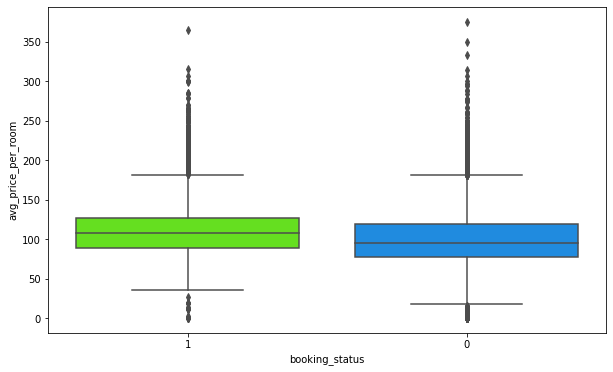

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df, x="booking_status", y="avg_price_per_room", palette="gist_rainbow"
)
plt.show()

**Observations:**
- There is a slight correlation between the cancelled bookings and the prices. The average room price for cancelled bookings is slightly higher.  Both booking statuses have outliers below and above the minimum and maximum rates.
- No change after data processing. 

### <font color='purple'>**Many guests have special requirements when booking a hotel room. Let's see how it impacts cancellations**</font>

no_of_previous_cancellations      0    1   2   3   4   5  6  11  13    All
no_of_special_requests                                                    
2                              4347    4   1   2   1   7  1   1   0   4364
All                           35937  198  46  43  10  11  1  25   4  36275
0                             19553  153  25  28   3   3  0   8   4  19777
1                             11284   39  14  13   6   1  0  16   0  11373
3                               668    1   6   0   0   0  0   0   0    675
4                                77    1   0   0   0   0  0   0   0     78
5                                 8    0   0   0   0   0  0   0   0      8
------------------------------------------------------------------------------------------------------------------------


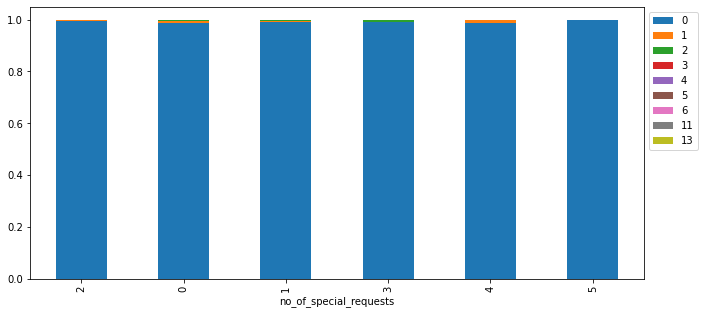

In [ ]:
stacked_barplot(df, "no_of_special_requests", "no_of_previous_cancellations")

**Observations:**
- We can observe that special request have impact on the cancellation rates, with customers with special requests having much less cancellations. Most of the cancellations are correlated with 1 special request bookings. There are a few cancellations with 3 and 4 special request bookings.
- No change after the data processing.

### <font color='purple'>**Let's see if the special requests made by the customers impacts the prices of a room**</font>

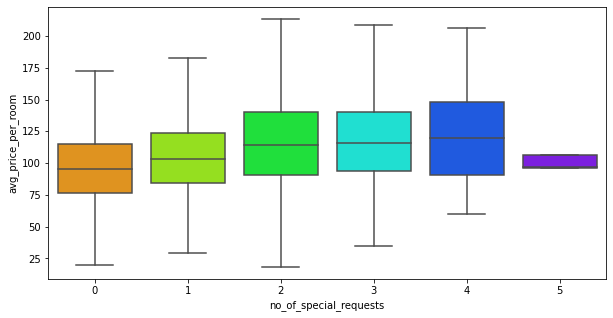

In [ ]:
## We will complete the code to create boxplot for no of special requests and average price per room (excluding the outliers)
plt.figure(figsize=(10, 5))
sns.boxplot(
    data=df, x="no_of_special_requests", y="avg_price_per_room", palette="gist_rainbow",showfliers = False
)  
plt.show()

**Observations:**
- We can see that the average number of special requests slightly rises with the average price per room.
- No change after data processing.

### <font color='purple'>**We saw earlier that there is a positive correlation between booking status and average price per room. Let's analyze it.**</font>


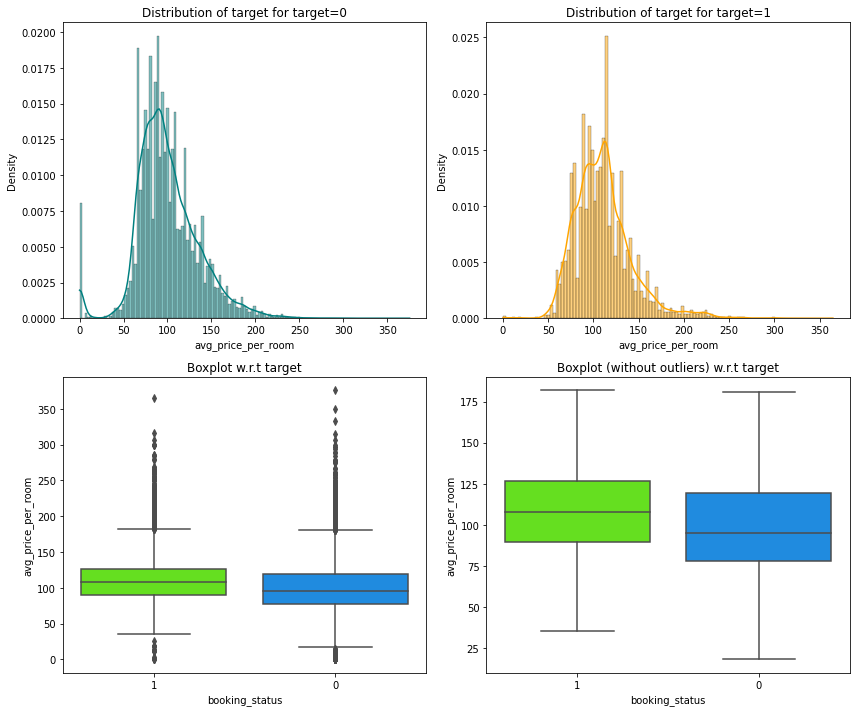

In [ ]:
distribution_plot_wrt_target(df, "avg_price_per_room", "booking_status")

**Observations:**
- From the distribution of the cancelled and not cancelled bookings we can see that both statuses have a normal distribution, with a concentration on the statuses on about 100 euros.
- The minimum price of the cancelled bookings (27) is higher than the not cancelled bookings (20-22).
- No change after data processing.


### <font color='purple'>**There is a positive correlation between booking status and lead time also. Let's analyze it further.**</font>

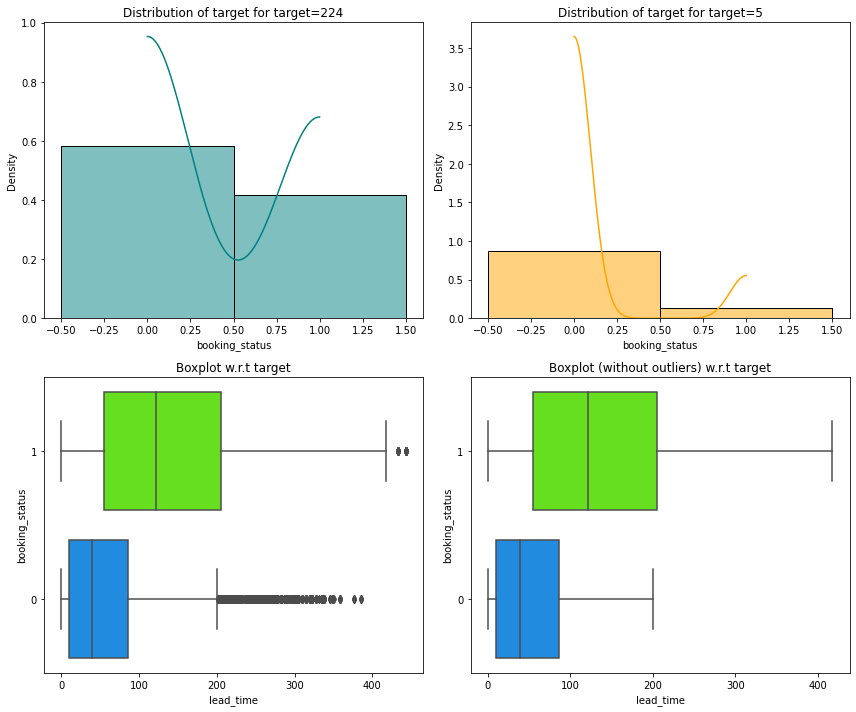

In [ ]:
distribution_plot_wrt_target(df, "booking_status", "lead_time")

**Observations:**
- We can observe that longer the lead time there are more cancellations, while not-cancelled bookings have a lot of outliers above the max lead time.
- The 75th
 quartile of the lead time for not-cancelled bookings are almost equal to the average lead time of the cancelled bookings.
- The 75th quartile of the cancelled bookings lead time is close to the maximum lead time of the not-cancelled bookings. 

### <font color='purple'>**Generally people travel with their spouse and children for vacations or other activities. Let's create a new dataframe of the customers who traveled with their families and analyze the impact on booking status.**</font>

In [ ]:
# Let's see how many rooms will be included in a family dataframe:
family_data = df[(df["no_of_children"] >= 0) & (df["no_of_adults"] > 1)]
family_data.shape

(28441, 18)

In [ ]:
# Let's create a dataframe which represents a family: more than one adult and have children.
family_data["no_of_family_members"] = (
    family_data["no_of_adults"] + family_data["no_of_children"]
)

booking_status           1      0    All
no_of_family_members                    
All                   9985  18456  28441
2                     8213  15506  23719
3                     1368   2425   3793
4                      398    514    912
5                        6     11     17
------------------------------------------------------------------------------------------------------------------------


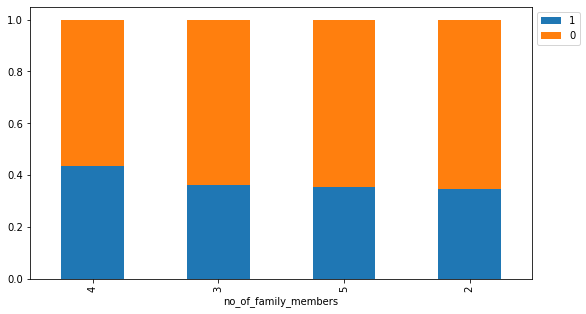

In [ ]:
#Let's create a barplot that shows the relationship between number of family members and booking status:
stacked_barplot(family_data,"no_of_family_members","booking_status")

**Observations:**
- We can say that the number of family members are not very different by the cancellation rates.In general, for the customers with families, the not-cancelled bookings are at a higher rate than the cancelled bookings.
- No change after data processing.

### <font color='purple'>**Let's do a similar analysis for the customer who stay for at least a day at the hotel.**</font>

In [ ]:
#Let's see how many rows there are in total with more than 0 week and weekend nights:
total_days = df[(df["no_of_week_nights"] > 0) & (df["no_of_weekend_nights"] > 0)]
total_days.shape

(17094, 18)

In [ ]:
total_days["total_days"] = (
    total_days["no_of_week_nights"] + total_days["no_of_weekend_nights"]
)

booking_status     1      0    All
total_days                        
All             6115  10979  17094
3               2183   3689   5872
4               1387   2977   4364
5                738   1593   2331
2                639   1301   1940
6                465    566   1031
7                383    590    973
8                 79    100    179
10                58     51    109
9                 53     58    111
14                27      5     32
15                26      5     31
13                15      3     18
12                15      9     24
11                15     24     39
20                 8      3     11
19                 5      1      6
16                 5      1      6
17                 4      1      5
18                 3      0      3
21                 3      1      4
22                 2      0      2
23                 1      1      2
24                 1      0      1
------------------------------------------------------------------------------------------

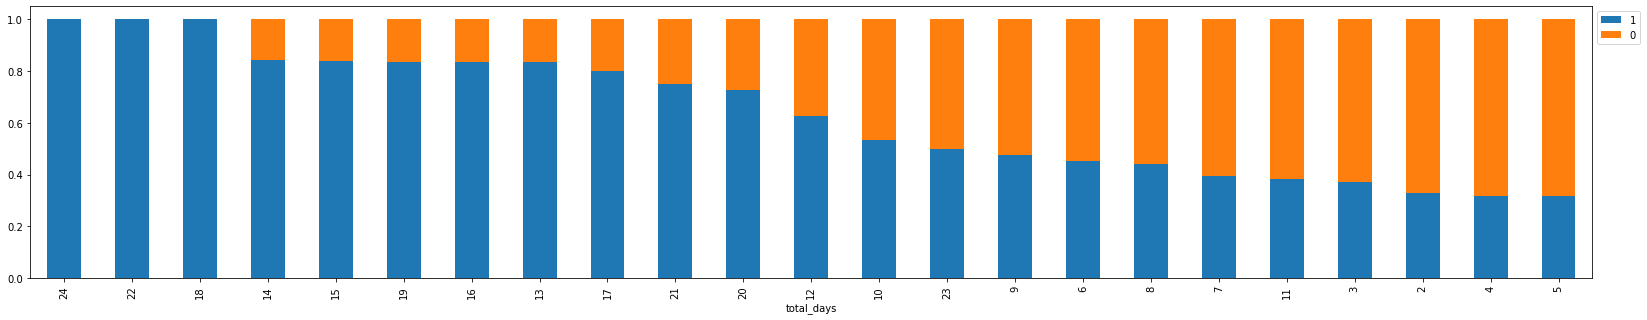

In [ ]:
#Let's create a barplot that shows the relationship between stay of at least one day and booking status:
stacked_barplot(total_days,"total_days","booking_status")

**Observations:**
- We can see that shorter stays have less cancellations than longer stays
- Bookings with 18, 22, and 24 days have all been cancelled. 
- No change after data processing.

### <font color='purple'>**Repeating guests are the guests who stay in the hotel often and are important to brand equity. Let's see what percentage of repeating guests cancel?**</font>

no_of_previous_cancellations      0    1   2   3   4   5  6  11  13    All
repeated_guest                                                            
1                               592  198  46  43  10  11  1  25   4    930
All                           35937  198  46  43  10  11  1  25   4  36275
0                             35345    0   0   0   0   0  0   0   0  35345
------------------------------------------------------------------------------------------------------------------------


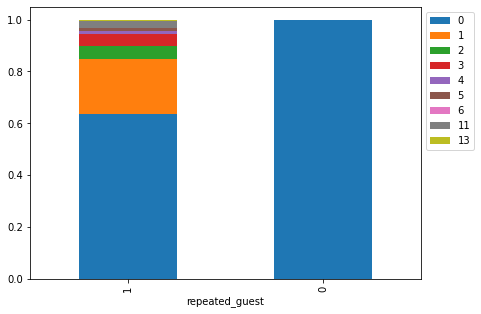

In [ ]:
stacked_barplot(df, "repeated_guest", "no_of_previous_cancellations")

**Observations:**
- Around 35% of the repeated guests have at least one previous cancellation.
- No change after data processing. 

### <font color='purple'>**Let's find out what are the busiest months in the hotel.**</font>

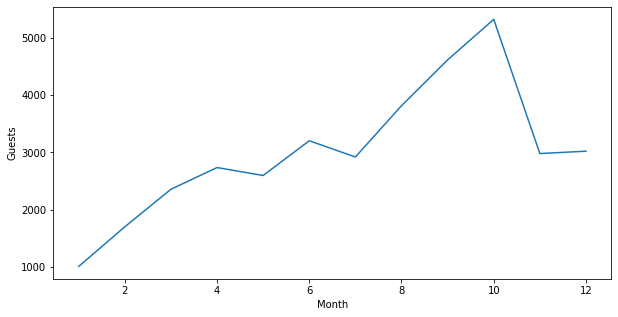

In [ ]:
# Let's group the data on arrival months and extracting the count of bookings
monthly_data = df.groupby(["arrival_month"])["booking_status"].count()

# Let's create a dataframe with months and count of customers in each month
monthly_data = pd.DataFrame(
    {"Month": list(monthly_data.index), "Guests": list(monthly_data.values)}
)

# Now we need to plot the trend over different months
plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_data, x="Month", y="Guests")
plt.show()

**Observations:**
- The line plot shows that winter months have the least booking numbers. The guests considerably increase closer to august, with a peak month being September and October. 
 -No change after data processing.

### <font color='purple'>**Let's check the rate of bookings cancelled in each month.**</font>

booking_status      1      0    All
arrival_month                      
All             11885  24390  36275
10               1880   3437   5317
9                1538   3073   4611
8                1488   2325   3813
7                1314   1606   2920
6                1291   1912   3203
4                 995   1741   2736
5                 948   1650   2598
11                875   2105   2980
3                 700   1658   2358
2                 430   1274   1704
12                402   2619   3021
1                  24    990   1014
------------------------------------------------------------------------------------------------------------------------


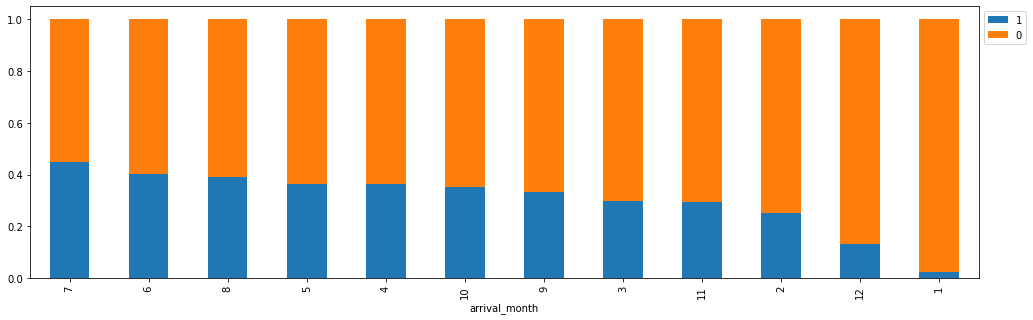

In [ ]:
stacked_barplot(df, "arrival_month","booking_status")

**Observations:**
- We can see that summer months have higher cancellations than fall and winter.January has the least number of cancellations, followed by December and February.
- No change after data processing.


### <font color='purple'>**As hotel room prices are dynamic, Let's see how the prices vary across different months.**</font>

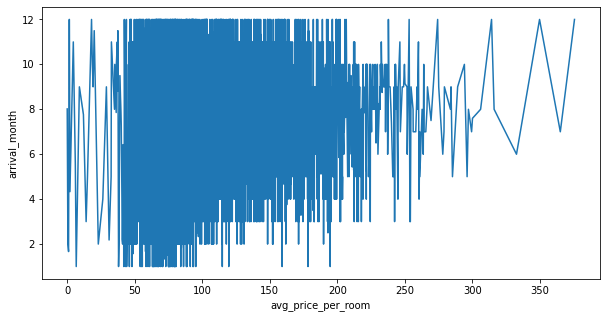

In [ ]:
# We will create lineplot between average price per room and arrival month:
plt.show()
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x='avg_price_per_room', y='arrival_month', ci=False)  

**Observations:**
- We can see that there is a high concentration of the average price between 50 and 100 euros across the months. 
- Higher prices per room are mainly common in the busy months: 8, 10 , 12.
- No change after data processing.

## **Reflections on Analysis:**
- From the second EDA analysis after the data processing we observed no changes in data outcomes that would have affected the our initial reflections on analysis.

# **Model Building**

---



---



## <font color='purple'>**Logistic regression**</font>

**Data Preparation for modeling (Logistic Regression)**
- We want to predict which bookings will be canceled.
- Before we proceed to build a model, we'll have to encode categorical features.
- We'll split the data into train and test to be able to evaluate the model that we build on the train data.

In [ ]:
X = df.drop(["booking_status"], axis=1)
Y = df["booking_status"]

# Let's add constant
X = sm.add_constant(X) 
# We will create dummies for X
X = pd.get_dummies(X, drop_first=True) 
# Splitting data in train and test sets in the ration 70:30 with random_state=1
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
) 

In [ ]:
# Let's print the train and test data set shapes:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 18)
Shape of test set :  (10883, 18)
Percentage of classes in training set:
0   0.67064
1   0.32936
Name: booking_status, dtype: float64
Percentage of classes in test set:
0   0.67638
1   0.32362
Name: booking_status, dtype: float64


**Observations:**
- We see that the train and test data was split in 70:30 ratio.
- We see that 67% of the booking status is 0 (not cancelled) and around 33% is 1 (cancelled) and this distribution is preserved in the train and test sets.

## <font color='purple'>**Building Logistic Regression Model**</font>

In [ ]:
# fitting logistic regression model
logit = sm.Logit(y_train, X_train.astype(float))
lg = logit.fit(disp=False)

print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25374
Method:                           MLE   Df Model:                           17
Date:                Sun, 16 Oct 2022   Pseudo R-squ.:                  0.3094
Time:                        02:38:03   Log-Likelihood:                -11113.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                -1065.3175    117.020     -9.104      0.000   -1294.672    -835.963
no_of_adults                             0.0623      

**Observations**

- Negative values of the coefficient shows that probability of customer cancelling the booking decreases with the increase of corresponding attribute value. For example, higher the number of special request, the less it is probable that the booking will be cancelled. Or,more repeated guests will actually decrease the probability of the bookings to be cancelled.

- Positive values of the coefficient show that that probability of customer cancelling the booking increases with the increase of corresponding attribute value. For example, higher number of weekend bookings indicate a probability of higher cancellations. Or, customers with higher previous cancellations have a higher tendency to cancel their booking in the future.

- p-value of a variable indicates if the variable is significant or not. If we consider the significance level to be 0.05 (5%), then any variable with a p-value less than 0.05 would be considered significant.

- But these variables might contain multicollinearity, which will affect the p-values.

* We will have to remove multicollinearity from the data to get reliable coefficients and p-values.

* There are different ways of detecting (or testing) multi-collinearity, one such way is the Variation Inflation Factor.

### <font color='purple'>**Model evaluation criterion**</font>

### Model can make wrong predictions as:

1. Predicting a customer will not cancel their booking but in reality, the customer will cancel their booking.
2. Predicting a customer will cancel their booking but in reality, the customer will not cancel their booking. 

### Which case is more important? 
* Both the cases are important as:

* If we predict that a booking will not be canceled and the booking gets canceled then the hotel will lose resources and will have to bear additional costs of distribution channels.

* If we predict that a booking will get canceled and the booking doesn't get canceled the hotel might not be able to provide satisfactory services to the customer by assuming that this booking will be canceled. This might damage the brand equity. 



### How to reduce the losses?

* Hotel would want `F1 Score` to be maximized, greater the F1  score higher are the chances of minimizing False Negatives and False Positives. 
-  * fi_score is computed as
  $$f1\_score = \frac{2 * Precision * Recall}{Precision + Recall}$$

#### **First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.**
* The model_performance_classification_statsmodels function will be used to check the model performance of models. 
* The confusion_matrix_statsmodels function will be used to plot the confusion matrix.

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
# defining a function to plot the confusion_matrix of a classification model


def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

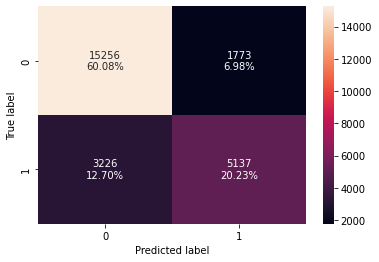

In [ ]:
# Let's build the confusion matrix:
confusion_matrix_statsmodels(lg, X_train, y_train)

#### **The confusion matrix**

* True Positives (TP):  A customer did not cancel and the model predicted the customer will not cancel- 60%.
* True Negatives (TN): A customer cancelled and the model predicted the customer will cancel- 20.23%.
* False Positives (FP): - A customer did not cancel and the model predicted the customer will cancel- 6.98%.
* False Negatives (FN): A customer cancelled and the model predicted the customer will not cancel- 12.70%.

In [ ]:
# Let's calculate the F1 score now:
print("Training performance:")
model_performance_classification_statsmodels(lg, X_train, y_train)

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80313,0.61425,0.74342,0.67269


**Observations**

- The **f1_**score of the model is** ~0.67** and we will try to maximize it further

- The variables used to build the model might contain multicollinearity, which will affect the p-values

* We will have to remove multicollinearity from the data to get reliable coefficients and p-values

### <font color='purple'>**Checking Multicollinearity**</font>

- In order to make statistical inferences from a logistic regression model, it is important to ensure that there is no multicollinearity present in the data.

There are different ways of detecting (or testing for) multicollinearity. One such way is using the Variation Inflation Factor (VIF).

* **Variance  Inflation  factor**:  Variance  inflation  factors  measure  the  inflation  in  the variances of the regression coefficients estimates due to collinearities that exist among the  predictors.  It  is  a  measure  of  how  much  the  variance  of  the  estimated  regression coefficient $\beta_k$ is "inflated" by  the  existence  of  correlation  among  the  predictor variables in the model. 

* **General Rule of thumb**:
  - If VIF is **1** then there is no correlation among the $k$th predictor and the remaining predictor variables, and  hence  the variance of $\beta_k$ is not inflated at all
  - If VIF exceeds **5**, we say there is moderate multicollinearity
  - If VIF is equal or exceeding **10**, it shows signs of high multi-collinearity

* The purpose of the analysis should dictate which threshold to use.

In [ ]:
# we will define a function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [ ]:
checking_vif(X_train)

,feature,VIF
0,const,38556288.66849
1,no_of_adults,1.30184
2,no_of_children,1.27702
3,no_of_weekend_nights,1.06251
4,no_of_week_nights,1.08185
5,type_of_meal_plan,1.35721
6,required_car_parking_space,1.03439
7,room_type_reserved,1.49694
8,lead_time,1.31291
9,arrival_year,1.39782


**Observations:**
- We observe that there is no multicollinearity present in the data.
* Hence, The values of coefficient and p-values are reliable.

### <font color='purple'>**Dropping high p-value variables**</font>

- We will drop the predictor variables having a p-value greater than 0.05 as they do not significantly impact the target variable.
- But sometimes p-values change after dropping a variable. So, we'll not drop all variables at once.
- Instead, we will do the following:
    - Build a model, check the p-values of the variables, and drop the column with the highest p-value.
    - Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value.
    - Repeat the above two steps till there are no columns with p-value > 0.05.

The above process can also be done manually by picking one variable at a time that has a high p-value, dropping it, and building a model again. But that might be a little tedious and using a loop will be more efficient.

In [ ]:
# initial list of columns
cols = X_train.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = X_train[cols]

    # fitting the model
    model = sm.Logit(y_train, x_train_aux).fit(disp=False)

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'no_of_weekend_nights', 'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month', 'market_segment_type', 'repeated_guest', 'avg_price_per_room', 'no_of_special_requests']


In [ ]:
# Let's define our updated model:
X_train1 = X_train[selected_features]
X_test1 = X_test[selected_features]

In [ ]:
# Fitting logistic regression model with the updated data:
logit1 = sm.Logit(y_train, X_train1.astype(float))
lg1 = logit1.fit(disp=False)
print(lg1.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25379
Method:                           MLE   Df Model:                           12
Date:                Sun, 16 Oct 2022   Pseudo R-squ.:                  0.3091
Time:                        02:38:43   Log-Likelihood:                -11117.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                      -1057.6873    116.886     -9.049      0.000   -1286.781    -828.594
no_of_weekend_nights           0.1121      0.019      5.787      0.000       0.074 

In [ ]:
print("Training performance:")
model_performance_classification_statsmodels(lg1, X_train1, y_train)

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80218,0.61545,0.74015,0.67206


**Observations:**

- We do not see any change in the model performance after dropping the high p-value variables.
- We will consider **X-train1** and **lg1** as our final model.  Now, we will check the model performance and make interpretations.

### <font color='purple'>**Converting coefficient to odds**</font>

* The coefficients of the logistic regression model are in terms of log(odd), to find the odds we have to take the exponential of the coefficients. 
* Therefore, **odds =  exp(b)**
* The percentage change in odds is given as **odds = (exp(b) - 1) * 100**

In [ ]:
# converting coefficients to odds
odds = np.exp(lg1.params)

# finding the percentage change
perc_change_odds = (np.exp(lg1.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train1.columns).T

,const,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,market_segment_type,repeated_guest,avg_price_per_room,no_of_special_requests
Odds,0.00000,1.11864,1.04785,0.79405,0.22703,0.90631,1.01434,1.68795,0.95925,0.31782,0.27619,1.01962,0.25947
Change_odd%,-100.00000,11.86378,4.78470,-20.59468,-77.29684,-9.36918,1.43382,68.79463,-4.07468,-68.21756,-72.38065,1.96210,-74.05311


### Coefficient interpretations

* `Number of Weekend Nights`: Holding all other features constant, a unit change in the number of weekend nights will increase the odds of a booking being cancelled by 1.1186 times or a ~ 11.86% increase in the odds of the bookings being cancelled.

* `Number of Week Nights`: Holding all other features constant, a unit change in the number of week nights will increase the odds of a booking being cancelled by 1.0478 times or a ~4.7% increase in the odds of the bookings being cancelled.

* `Type of Meal Plan`: Holding all other features constant, a unit change in the type of meal plan will decrease the odds of a booking being cancelled by 0.7940 times or a  ~ 20% decrease in odds of the bookings being cancelled.

* `Required Car Parking Space`: Holding all other features constant, a unit change in the required car parking space will decrease the odds of a booking being cancelled by 0.2270 times or a  ~ 77% decrease in odds of the bookings being cancelled.

* `Room Type Reserved`: Holding all other features constant, a unit change in the room type reserved will decrease the odds of a booking being cancelled by 0.9063 times or a  ~ 9.3% decrease in odds of the bookings being cancelled.

* `Lead Time`: Holding all other features constant, a unit change in the lead time will increase the odds of a booking being cancelled by 1.0143 times or a 1.4% increase in the odds of the bookings being cancelled.

* `Arrival_Month`: Holding all other features constant, a change in the arrival month will decrease the odds of a booking being cancelled by 0.9592 times or a  ~ 4% decrease in odds of the bookings being cancelled.

* `Market Segment Type`: Holding all other features constant, a change in the market segment type will decrease the odds of a booking being cancelled by 0.3178 times or a  ~ 68% decrease in odds of the bookings being cancelled.

* `Repeated Guests`: Holding all other features constant, a positive change in the repeated guests will decrease the odds of a booking being cancelled by 0.2761 times or a  ~ 72% decrease in odds of the bookings being cancelled.

* `Average Price per Room`: Holding all other features constant, a unit change in the average price per room will increase the odds of a booking being cancelled by 1.0196 times or a ~2 % increase in the odds of the bookings being cancelled.

* `Number of Special Requests`: Holding all other features constant, a positive change in the number of special requests  will decrease the odds of a booking being cancelled by 0.2594 times or a  ~ 74% decrease in odds of the bookings being cancelled.


### <font color='purple'>**Checking model performance on the training set**</font>

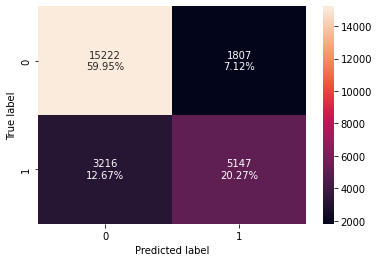

In [ ]:
# Let's create a confusion matrix with the new model:
confusion_matrix_statsmodels(lg1, X_train1, y_train)

#### **The confusion matrix**

* True Positives (TP):  A customer did not cancel and the model predicted the customer will not cancel- 59%.
* True Negatives (TN): A customer cancelled and the model predicted the customer will cancel- 20.27%.
* False Positives (FP): - A customer did not cancel and the model predicted the customer will cancel- 7.12%.
* False Negatives (FN): A customer cancelled and the model predicted the customer will not cancel- 12.67%.

In [ ]:
print("Training performance:")
log_reg_model_train_perf = model_performance_classification_statsmodels(lg1,X_train1, y_train) ## Complete the code to check performance on X_train1 and y_train
log_reg_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80218,0.61545,0.74015,0.67206


**Observations:**

- We do not see any change in the model performance.

### <font color='purple'>**ROC Curve and ROC-AUC**</font>
*  Let's see if the f1_score can be improved further by changing the model threshold
* First, we will check the ROC curve, compute the area under the ROC curve (ROC-AUC), and then use it to find the optimal threshold
* Next, we will check the Precision-Recall curve to find the right balance between precision and recall as our metric of choice is f1_score

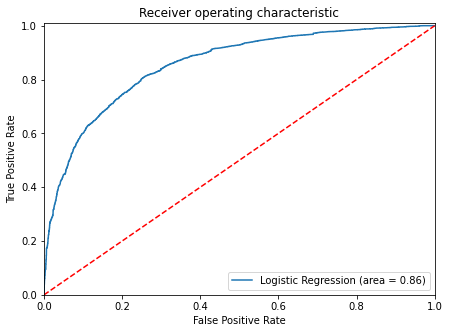

In [ ]:
logit_roc_auc_train = roc_auc_score(y_train, lg1.predict(X_train1))
fpr, tpr, thresholds = roc_curve(y_train, lg1.predict(X_train1))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

* Model is performing well on the training set.

## **Model Performance Improvement**

We will check if the recall score can be improved by changing the model threshold using AUC-ROC Curve.

### <font color='purple'>**Optimal threshold using AUC-ROC curve**</font>

In [ ]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg1.predict(X_train1))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.295602438004511


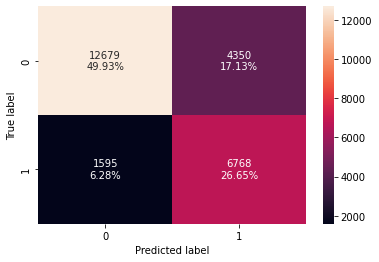

In [ ]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_train1, y_train,optimal_threshold_auc_roc)

#### **The confusion matrix**

* True Positives (TP):  A customer did not cancel and the model predicted the customer will not cancel- 49%.
* True Negatives (TN): A customer cancelled and the model predicted the customer will cancel- 26.65%.
* False Positives (FP): - A customer did not cancel and the model predicted the customer will cancel- 17.13%.
* False Negatives (FN): A customer cancelled and the model predicted the customer will not cancel- 6.28%.

In [ ]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg1, X_train1, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


,Accuracy,Recall,Precision,F1
0,0.76587,0.80928,0.60874,0.69483


**Observations:**
* Model performance has improved significantly.
* Model is giving a recall of **0.80** as compared to initial model which was giving a recall of **0.61** 
* Precision has decreased from **0.74** to **0.60**.
- F1 score has increased from **0.67** to **0.69**

### **Let's use Precision-Recall curve and see if we can find a better threshold**

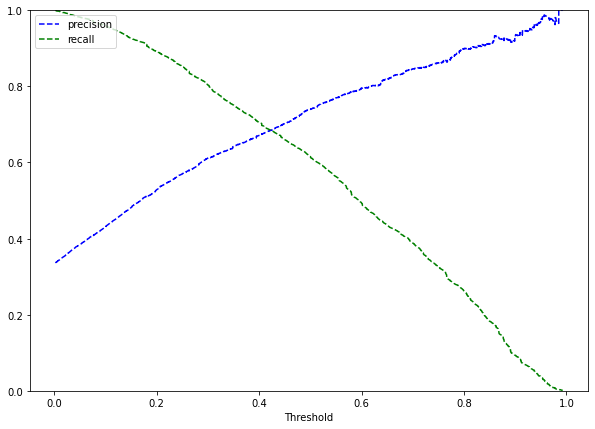

In [ ]:
y_scores = lg1.predict(X_train1)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

- At threshold around 0.42 we get balanced recall and precision.

In [ ]:
# setting the threshold
optimal_threshold_curve = 0.42

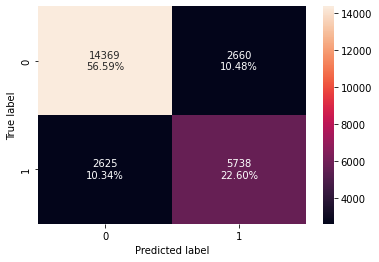

In [ ]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_train1, y_train,threshold=optimal_threshold_curve
)

**Observations:**
- We can see that our FP and FN rates are almost equal now.

In [ ]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(
    lg1, X_train1, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


,Accuracy,Recall,Precision,F1
0,0.79186,0.68612,0.68326,0.68468


**Observations:**

* Model performance has balanced out.
* Model is giving a recall of **0.68**, a decrease from the second model with **0.80**, but higher as compared to initial model which was giving a recall of **0.61** 
* Precision has increased from the second model: from **0.60** to **0.68**. It is slighly lower from the initial model which was giving a precision of **0.74**.
- The F1 has decreased from **0.69** in the second model to **0.68**. But, it is higher than in the initial model: **0.67**.

# **Model performance evaluation**

---



### <font color='purple'>**Training test comparisons**</font>

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression statsmodel",
    "Logistic Regression-0.29 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression statsmodel,Logistic Regression-0.29 Threshold,Logistic Regression-0.42 Threshold
Accuracy,0.80218,0.76587,0.79186
Recall,0.61545,0.80928,0.68612
Precision,0.74015,0.60874,0.68326
F1,0.67206,0.69483,0.68468


### <font color='purple'>**Performance on the Test Set**</font>

### **Dropping the columns from the test set that were dropped from the training set**

In [ ]:
X_test1 = X_test[X_train1.columns].astype(float)

### **Using model with default threshold**

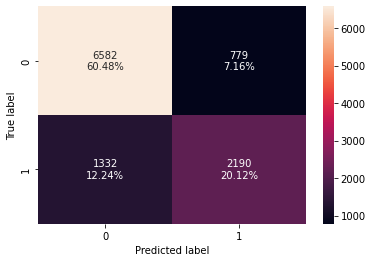

In [ ]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_test1, y_test)

In [ ]:
log_reg_model_test_perf = model_performance_classification_statsmodels(
    lg1, X_test1, y_test
) ## Complete the code to check performance on X_test1 and y_test

print("Test performance:")
log_reg_model_test_perf 

Test performance:


,Accuracy,Recall,Precision,F1
0,0.80603,0.62181,0.73762,0.67478


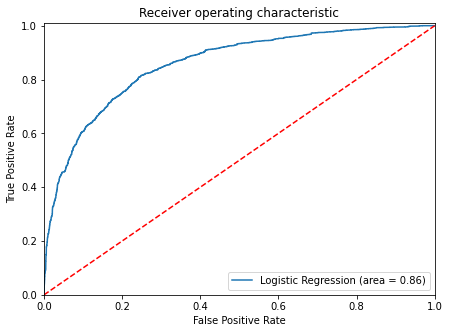

In [ ]:
logit_roc_auc_train = roc_auc_score(y_test, lg1.predict(X_test1))
fpr, tpr, thresholds = roc_curve(y_test, lg1.predict(X_test1))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

### **Using model with threshold=0.29** 

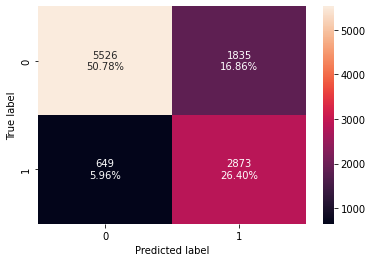

In [ ]:
# creating confusion matrix
confusion_matrix_statsmodels(
    lg1, X_test1, y_test, threshold=optimal_threshold_auc_roc
)

In [ ]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg1, X_test1, y_test, threshold=optimal_threshold_auc_roc
)
print("Test performance:")
log_reg_model_test_perf_threshold_auc_roc

Test performance:


,Accuracy,Recall,Precision,F1
0,0.77175,0.81573,0.61024,0.69818


### **Using model with threshold = 0.42**

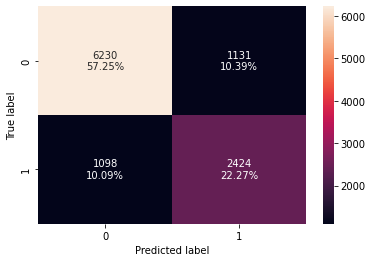

In [ ]:
# creating confusion matrix
confusion_matrix_statsmodels(
    lg1, X_test1, y_test, threshold=optimal_threshold_curve
)

In [ ]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_statsmodels(
    lg1, X_test1, y_test, threshold=optimal_threshold_curve
)
print("Test performance:")
log_reg_model_test_perf_threshold_curve

Test performance:


,Accuracy,Recall,Precision,F1
0,0.79519,0.68825,0.68186,0.68504


# **Final Model Summary**

---



---



### **Let us summarize the performance of all the models on both train and test sites:**

### <font color='purple'>**Training Set Model Comparison**</font>

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression-default Threshold",
    "Logistic Regression-0.29 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression-default Threshold,Logistic Regression-0.29 Threshold,Logistic Regression-0.42 Threshold
Accuracy,0.80218,0.76587,0.79186
Recall,0.61545,0.80928,0.68612
Precision,0.74015,0.60874,0.68326
F1,0.67206,0.69483,0.68468


### <font color='purple'>**Testing Set Model Comparison**</font>

In [ ]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression statsmodel",
    "Logistic Regression-0.29 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Logistic Regression statsmodel,Logistic Regression-0.29 Threshold,Logistic Regression-0.42 Threshold
Accuracy,0.80603,0.77175,0.79519
Recall,0.62181,0.81573,0.68825
Precision,0.73762,0.61024,0.68186
F1,0.67478,0.69818,0.68504


### <font color='purple'>**Reflections**</font>
- Almost all the three models are performing well on both training and test data without the problem of overfitting.
- The model with a **0.42** threshold is giving the most optimal F1 score with balanced recal and precision and a second highest accuracy score. Therefore it can be selected as the final model.

# **Building a Decision Tree model**

---



### <font color='purple'>**Data Preparation for modeling (Decision Tree)**</font>
- We want to predict which bookings will be canceled.
- Before we proceed to build a model, we'll have to encode categorical features.
- We'll split the data into train and test to be able to evaluate the model that we build on the train data.

In [ ]:
X = df.drop(["booking_status"], axis=1)
Y = df["booking_status"]

# Let's add constant
X = sm.add_constant(X) 
# We will create dummies for X
X = pd.get_dummies(X, drop_first=True) 
# Splitting data in train and test sets in the ration 70:30 with random_state=1
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
) 

In [ ]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 18)
Shape of test set :  (10883, 18)
Percentage of classes in training set:
0   0.67064
1   0.32936
Name: booking_status, dtype: float64
Percentage of classes in test set:
0   0.67638
1   0.32362
Name: booking_status, dtype: float64


**Observations:**
We had seen that around 67% of observations belongs to class 0 (Not Cancelled) and 32% observations belongs to class 1 (Cancelled), and this is preserved in the train and test sets

#### **First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.**

* The model_performance_classification_sklearn function will be used to check the model performance of models. 
* The confusion_matrix_sklearnfunction will be used to plot the confusion matrix.

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [ ]:
model = DecisionTreeClassifier(random_state=1)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

### <font color='purple'>**Model Evaluation**</font>


### Model can make wrong predictions as:

1. Predicting a customer will not cancel their booking but in reality, the customer will cancel their booking.
2. Predicting a customer will cancel their booking but in reality, the customer will not cancel their booking. 

### Which case is more important? 
* Both the cases are important as:

* If we predict that a booking will not be canceled and the booking gets canceled then the hotel will lose resources and will have to bear additional costs of distribution channels.

* If we predict that a booking will get canceled and the booking doesn't get canceled the hotel might not be able to provide satisfactory services to the customer by assuming that this booking will be canceled. This might damage the brand equity. 

### How to reduce the losses?

* Hotel would want `F1 Score` to be maximized, greater the F1  score higher are the chances of minimizing False Negatives and False Positives. 
-  * fi_score is computed as
  $$f1\_score = \frac{2 * Precision * Recall}{Precision + Recall}$$


## **Decision Tree Default**

### <font color='purple'>**Checking model performance on training set**</font>


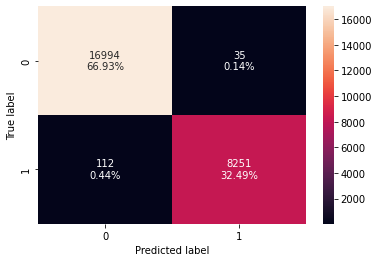

In [ ]:
confusion_matrix_sklearn(model, X_train, y_train)

#### **The confusion matrix**

* True Positives (TP):  A customer did not cancel and the model predicted the customer will not cancel- 67%.
* True Negatives (TN): A customer cancelled and the model predicted the customer will cancel- 32.49%.
* False Positives (FP): - A customer did not cancel and the model predicted the customer will cancel- 0.14%.
* False Negatives (FN): A customer cancelled and the model predicted the customer will not cancel- 0.44%.

In [ ]:
decision_tree_perf_train_without = model_performance_classification_sklearn(
    model, X_train, y_train
)
decision_tree_perf_train_without

,Accuracy,Recall,Precision,F1
0,0.99421,0.98661,0.99578,0.99117


### <font color='purple'>**Checking model performance on test set**</font>

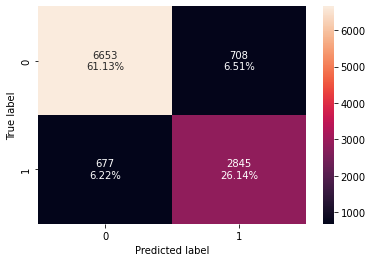

In [ ]:
confusion_matrix_sklearn(model, X_test, y_test)

In [ ]:
decision_tree_perf_test_without = model_performance_classification_sklearn(
    model, X_test, y_test
)
decision_tree_perf_test_without

,Accuracy,Recall,Precision,F1
0,0.87274,0.80778,0.80073,0.80424


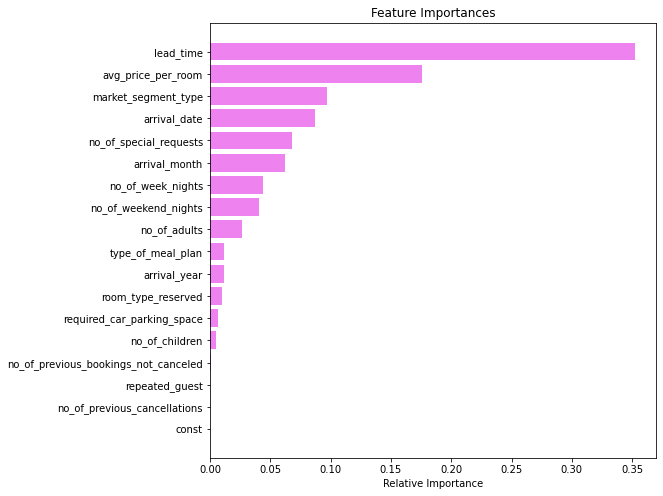

In [ ]:
# importance of features in the tree building

importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Observations:**
* There is a disparity in performance of model on training set and test set, which suggests that the model is overfiiting: 0.99421 0.98661	0.99578	0.99117 vs 0.87274	0.80778	0.80073	0.80424
- In the default model lead time, average room price and market segment type are the three most important factors affecting the cancellations.

## **Decision Tree (with class_weights)**

* If the frequency of class A is 10% and the frequency of class B is 90%, then class B will become the dominant class and the decision tree will become biased toward the dominant classes

* In this case, we will set class_weight = "balanced", which will automatically adjust the weights to be inversely proportional to the class frequencies in the input data

* class_weight is a hyperparameter for the decision tree classifier

In [ ]:
# We will name this model1:
model1 = DecisionTreeClassifier(random_state=1, class_weight="balanced")
model1.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=1)

### <font color='purple'>**Checking model performance on the training set**</font>

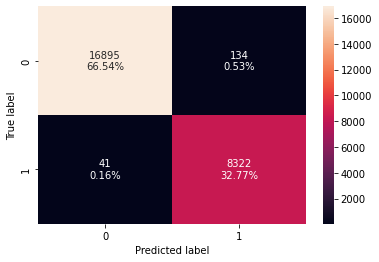

In [ ]:
confusion_matrix_sklearn(model1, X_train, y_train)

In [ ]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model1, X_train, y_train
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,0.99311,0.99510,0.98415,0.98960


**Observations:**
* Model is able to classify all the data points on the training set.
* 0 errors on the training set, each sample has been classified correctly.
* As we know a decision tree will continue to grow and classify each data point correctly if no restrictions are applied as the trees will learn all the patterns in the training set.
* This generally leads to overfitting of the model as Decision Tree will perform well on the training set but will fail to replicate the performance on the test set.

### <font color='purple'>**Checking model performance on the test set**</font>

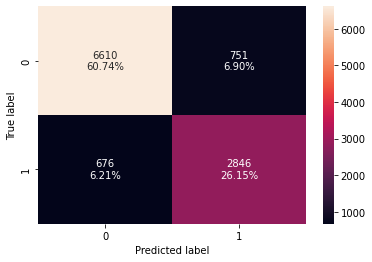

In [ ]:
confusion_matrix_sklearn(model1, X_test, y_test)

In [ ]:
decision_tree_perf_test = model_performance_classification_sklearn(
    model1, X_test, y_test
)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.86888,0.80806,0.79121,0.79955


In [ ]:
importances = model1.feature_importances_
importances

array([0.        , 0.0265368 , 0.00426907, 0.03382539, 0.04862597,
       0.010484  , 0.00755998, 0.0083448 , 0.35247801, 0.01579284,
       0.06578529, 0.08163355, 0.10629724, 0.00064311, 0.        ,
       0.00111012, 0.15008962, 0.08652423])

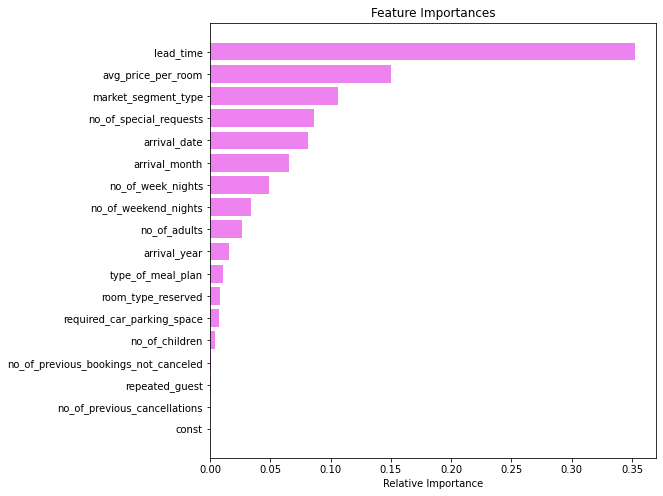

In [ ]:
# importance of features in the tree building

importances = model1.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Observations:**

- There is still overfitting between the training and testing sets.
- In model1, lead time, average room price, and market segment type are the three important factors in booking cancellations.

**Let's use pruning techniques to try and reduce overfitting.**

## **Decision Tree (Pre-Pruning)**

**Using GridSearch for Hyperparameter tuning of our tree model**

* Hyperparameter tuning is also tricky in the sense that there is no direct way to calculate how a change in the
  hyperparameter value will reduce the loss of your model, so we usually resort to experimentation. i.e we'll use Grid search
* Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters. 
* It is an exhaustive search that is performed on a the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

In [ ]:
# Choosing the type of classifier.
estimator = DecisionTreeClassifier(random_state=1, class_weight="balanced")

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(2, 7, 2),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=6, max_leaf_nodes=75,
                       min_samples_split=10, random_state=1)

### <font color='purple'>**Checking model performance on the training set**</font>

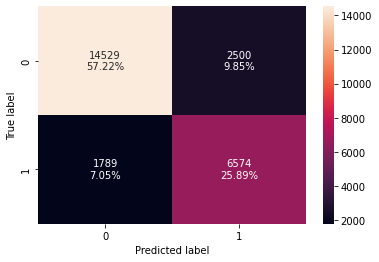

In [ ]:
confusion_matrix_sklearn(estimator, X_train, y_train)

In [ ]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    estimator, X_train, y_train
)
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.83109,0.78608,0.72449,0.75403


### <font color='purple'>**Checking model performance on the test set**</font>

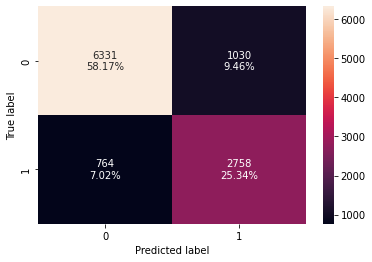

In [ ]:
confusion_matrix_sklearn(estimator, X_test, y_test)

In [ ]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    estimator, X_test, y_test
)
decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.83516,0.78308,0.72809,0.75458


**Observations:**
* The model is giving a generalized result now since the recall scores on both the train and test data are coming to be around 0.78 which shows that the model is able to generalize well on unseen data.

In [ ]:
# Let's plot the tree after pre-pruning:
feature_names = list(X_train.columns)
importances = estimator.feature_importances_
indices = np.argsort(importances)

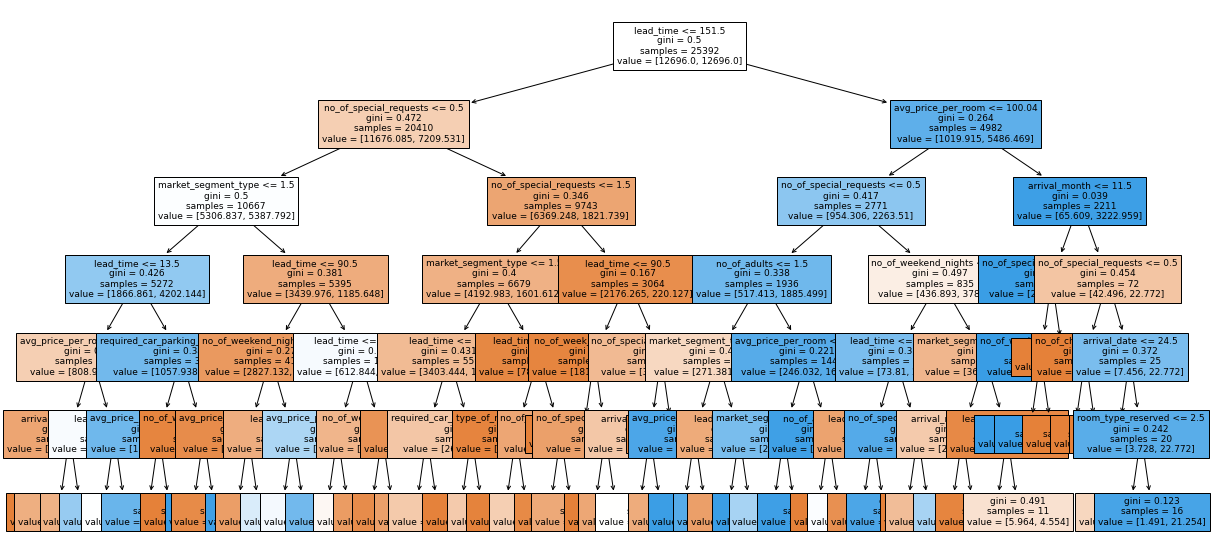

In [ ]:
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()


In [ ]:
# Text report showing the rules of a decision tree -
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type <= 1.50
|   |   |   |--- lead_time <= 13.50
|   |   |   |   |--- avg_price_per_room <= 99.44
|   |   |   |   |   |--- arrival_month <= 1.50
|   |   |   |   |   |   |--- weights: [92.45, 0.00] class: 0
|   |   |   |   |   |--- arrival_month >  1.50
|   |   |   |   |   |   |--- weights: [363.83, 132.08] class: 0
|   |   |   |   |--- avg_price_per_room >  99.44
|   |   |   |   |   |--- lead_time <= 3.50
|   |   |   |   |   |   |--- weights: [219.94, 85.01] class: 0
|   |   |   |   |   |--- lead_time >  3.50
|   |   |   |   |   |   |--- weights: [132.71, 280.85] class: 1
|   |   |   |--- lead_time >  13.50
|   |   |   |   |--- required_car_parking_space <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 71.92
|   |   |   |   |   |   |--- weights: [158.80, 159.40] class: 1
|   |   |   |   |   |--- avg_price_per_room >  71.92
|   |   |   |   |   |   |--- weights: [850.67, 3543.28] class: 1
|

**Observations from the pre-pruned tree:**

Using the above extracted decision rules we can make interpretations from the decision tree model like:

* If the lead time is less than or equal to 151.5, the number of special requests is less than or equal to 0.5, the market segment is less than or equal to 1.5 and the lead time is is less than or equal to 13.5, then the booking is most likey to be cancelled.

`Interpretations from other decision rules can be made similarly`

In [ ]:
importances = estimator.feature_importances_
importances

array([0.00000000e+00, 2.69097576e-02, 6.12661479e-18, 2.05821110e-02,
       7.46054891e-03, 9.49199830e-04, 1.40957893e-02, 2.85264886e-04,
       4.75385714e-01, 0.00000000e+00, 1.41198939e-02, 7.60096042e-04,
       1.94537533e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       7.57953820e-02, 1.69118710e-01])

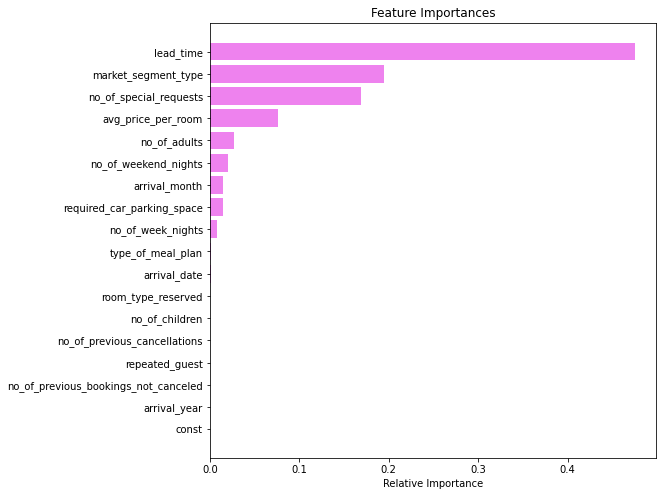

In [ ]:
# importance of features in the tree building

importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Observations:**
* In the pre tuned decision tree, lead time, market segment, and special requests are the most important features impacting the cancellation of the bookings.

## **Decision Tree (Post pruning)**

The `DecisionTreeClassifier` provides parameters such as
``min_samples_leaf`` and ``max_depth`` to prevent a tree from overfiting. Cost
complexity pruning provides another option to control the size of a tree. In
`DecisionTreeClassifier`, this pruning technique is parameterized by the
cost complexity parameter, ``ccp_alpha``. Greater values of ``ccp_alpha``
increase the number of nodes pruned. Here we only show the effect of
``ccp_alpha`` on regularizing the trees and how to choose a ``ccp_alpha``
based on validation scores.

**Total impurity of leaves vs effective alphas of pruned tree**

Minimal cost complexity pruning recursively finds the node with the "weakest
link". The weakest link is characterized by an effective alpha, where the
nodes with the smallest effective alpha are pruned first. To get an idea of
what values of ``ccp_alpha`` could be appropriate, scikit-learn provides
`DecisionTreeClassifier.cost_complexity_pruning_path` that returns the
effective alphas and the corresponding total leaf impurities at each step of
the pruning process. As alpha increases, more of the tree is pruned, which
increases the total impurity of its leaves.

In [ ]:
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced")
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

In [ ]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.00000,0.00838
1,0.00000,0.00838
2,0.00000,0.00838
3,0.00000,0.00838
4,0.00000,0.00838
...,...,...
1833,0.00890,0.32806
1834,0.00980,0.33786
1835,0.01272,0.35058
1836,0.03412,0.41882


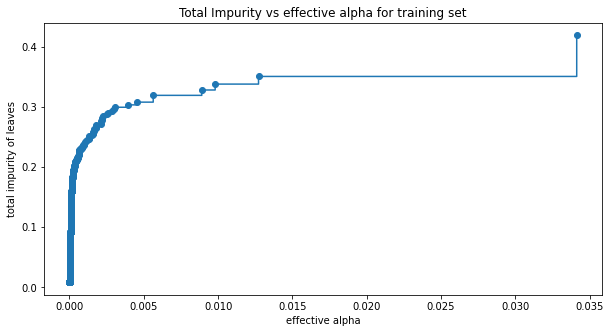

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using effective alphas. The last value
in ``ccp_alphas`` is the alpha value that prunes the whole tree,
leaving the tree, ``clfs[-1]``, with one node.

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced"
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.08117914389136938


For the remainder, we remove the last element in
``clfs`` and ``ccp_alphas``, because it is the trivial tree with only one
node. Here we show that the number of nodes and tree depth decreases as alpha
increases.

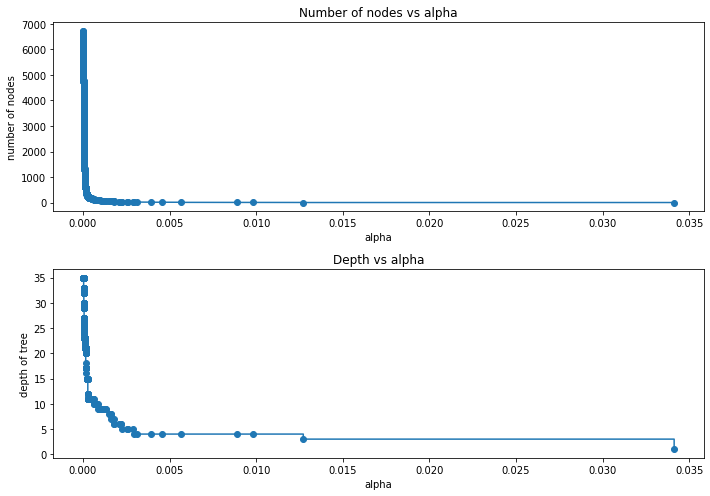

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

#### **F1 Score vs alpha for training and testing sets**

In [ ]:
f1_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = f1_score(y_train, pred_train)
    f1_train.append(values_train)

f1_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = f1_score(y_test, pred_test)
    f1_test.append(values_test)

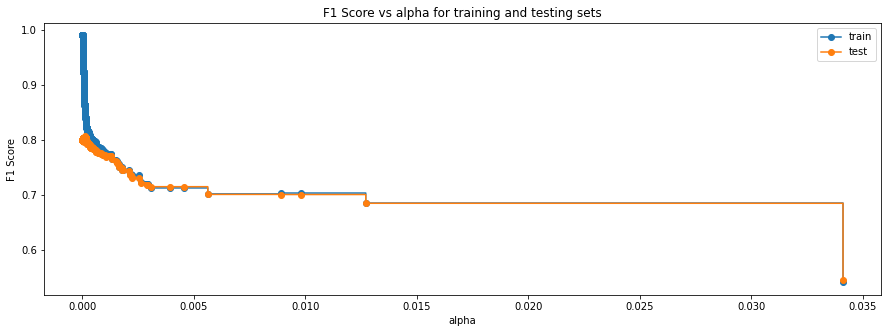

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("F1 Score")
ax.set_title("F1 Score vs alpha for training and testing sets")
ax.plot(ccp_alphas, f1_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, f1_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(f1_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.00014396725712034883,
                       class_weight='balanced', random_state=1)


### <font color='purple'>**Checking performance on training set**</font>

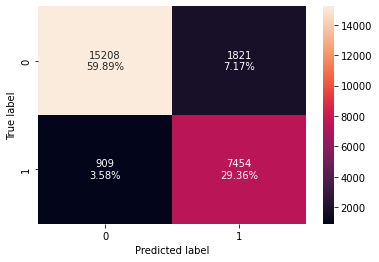

In [ ]:
confusion_matrix_sklearn(best_model, X_train, y_train)

In [ ]:
decision_tree_post_perf_train = model_performance_classification_sklearn(
    best_model, X_train, y_train
)
decision_tree_post_perf_train

,Accuracy,Recall,Precision,F1
0,0.89249,0.89131,0.80367,0.84522


### <font color='purple'>**Checking performance on the test set**</font>

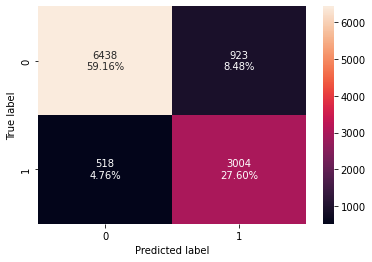

In [ ]:
confusion_matrix_sklearn(best_model, X_test, y_test)

In [ ]:
decision_tree_post_perf_test = model_performance_classification_sklearn(
    best_model, X_test, y_test
)
decision_tree_post_perf_test

,Accuracy,Recall,Precision,F1
0,0.86759,0.85292,0.76496,0.80655


**Observations:**
* In the post-pruned tree also, the model is giving a less generalized result with the recall scores on the train data being 0.89 and test data 0.85, which still shows that the model is able to generalize on unseen data.

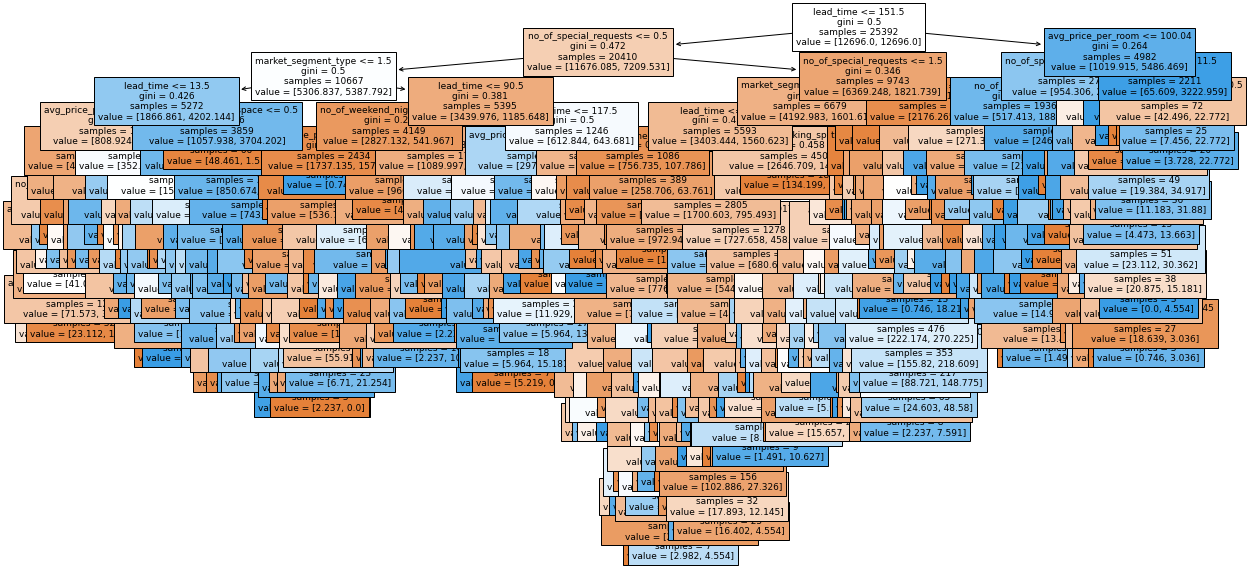

In [ ]:
# Let's plot the tree; 
plt.figure(figsize=(20, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

It seems too complex to be interpreted.


In [ ]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type <= 1.50
|   |   |   |--- lead_time <= 13.50
|   |   |   |   |--- avg_price_per_room <= 99.44
|   |   |   |   |   |--- arrival_month <= 1.50
|   |   |   |   |   |   |--- weights: [92.45, 0.00] class: 0
|   |   |   |   |   |--- arrival_month >  1.50
|   |   |   |   |   |   |--- arrival_month <= 8.50
|   |   |   |   |   |   |   |--- no_of_weekend_nights <= 1.50
|   |   |   |   |   |   |   |   |--- avg_price_per_room <= 70.05
|   |   |   |   |   |   |   |   |   |--- weights: [31.31, 0.00] class: 0
|   |   |   |   |   |   |   |   |--- avg_price_per_room >  70.05
|   |   |   |   |   |   |   |   |   |--- lead_time <= 5.50
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults <= 1.50
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [38.77, 1.52] class: 0
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults >  1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch 

In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        best_model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                         Imp
lead_time                            0.39866
market_segment_type                  0.15151
no_of_special_requests               0.12478
avg_price_per_room                   0.12185
arrival_month                        0.05755
arrival_date                         0.02982
no_of_week_nights                    0.02666
no_of_weekend_nights                 0.02573
no_of_adults                         0.02520
arrival_year                         0.01955
required_car_parking_space           0.01040
type_of_meal_plan                    0.00526
room_type_reserved                   0.00181
no_of_previous_bookings_not_canceled 0.00084
repeated_guest                       0.00035
no_of_previous_cancellations         0.00000
no_of_children                       0.00000
const                                0.00000


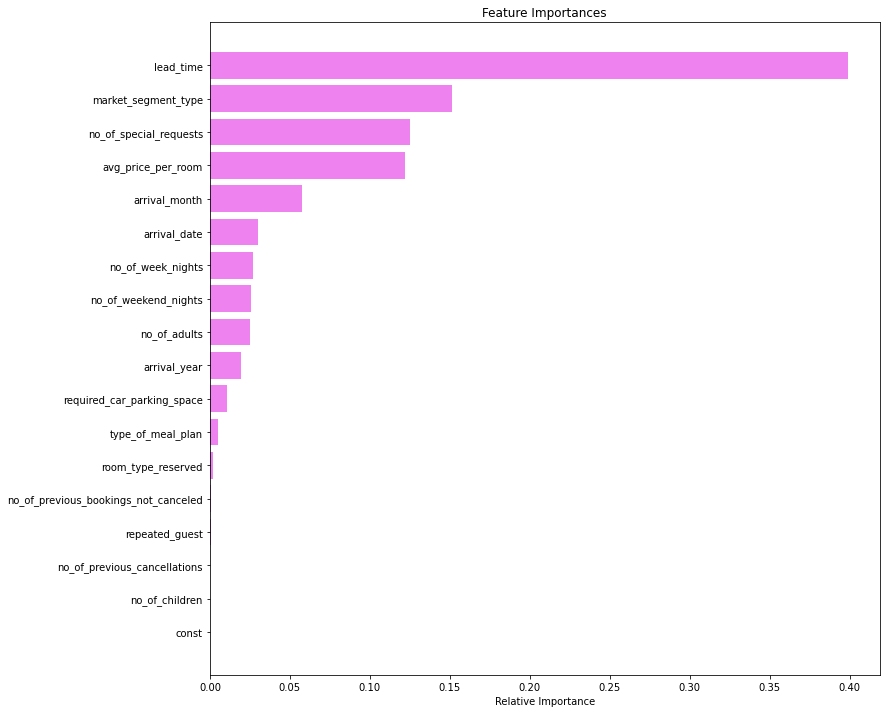

In [ ]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Observations:**
* In the post pruning decision tree, lead time, market segment, and special requests are still the most important features impacting the cancellation of the bookings.

## **Model Performance Comparison and Conclusions**

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train_without.T,
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_post_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree without class_weight",
    "Decision Tree with class_weight",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree without class_weight,Decision Tree with class_weight,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.99421,0.99311,0.83109,0.89249
Recall,0.98661,0.99510,0.78608,0.89131
Precision,0.99578,0.98415,0.72449,0.80367
F1,0.99117,0.98960,0.75403,0.84522


In [ ]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test_without.T,
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_post_perf_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree without class_weight",
    "Decision Tree with class_weight",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Decision Tree without class_weight,Decision Tree with class_weight,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.87274,0.86888,0.83516,0.86759
Recall,0.80778,0.80806,0.78308,0.85292
Precision,0.80073,0.79121,0.72809,0.76496
F1,0.80424,0.79955,0.75458,0.80655


**Reflections:**
- Even though the scores are higher on the first two decision tree models, there is an overfitting problem. The discrepencies between the scores of train and test sets are pretty high.
- The pre-pruning decision tree model gives the perfect fit and alignment between the train and test sets, but compared to the post-pruning model, the accuracy, recall, precision, and F1 scores on both sets are relatively lower. 
* Choosing the pre-pruned tree as the best model would be a better decision. It is less complex, and better fit with the test set. And considering that all the scores are higher than 0.7, the model is performing pretty well too. 

# **Actionable Insights and Recommendations**

---



---

**Insights on Logistic Regression Model:**
- All three models gave a generalized performance on training and test set.
- The highest recall is 80% on the training set.
- Using the model with **default** threshold the model will give the lowest recall 61% but good precision scores 74% - This model will help the hotel to save the resources but lose on customers as the hotel might not be able to provide satisfactory services to the customer by assuming that this booking will be canceled. This might damage the brand equity.
- Using the model with **0.29** threshold the model will give the highest recall 80% but low precision scores 60% - This model will help the hotel to identify the potential customers who might cancel, but the cost of resources will be high.
- Using the model with **0.42** threshold the model will give a balance recall and precision score, 68% and 68% - This model will help the hotel to maintain the balance in the cost of the resources in booking cancellations and identifying the potential customers who might cancel. 

- From our logistic regression model we identified that **market segmet** plays a critical role in identifying the cancellations. 
- **Returning guests** positively impact in decreasing the number of cancellations. Increasing loyal customers could decrease the booking cancellations by 72%. 
- Accomodating **special requests** can help the company to decrease the cancellations by74%.
- The similar positive affects can be observed in increasing the number of **parking slots** and providing certian type of meal plans. 

**Insights on Decision Tree Model:**
- From the decision tree, it has been observed that if the lead time is less than or equal to 151.5, the number of special requests is less than or equal to 0.5, the market segment is less than or equal to 1.5 and the lead time is less than or equal to 13.5, then the booking is most likey not going to be cancelled.
- The company should give a vigilant eye for these values in order to detect the bookings that might be cancelled.
- The pre-pruned decision tree model was chosen as the best option. It is less complex, better fit with the test set and gave the F1 score of 0.75.
- **Lead time, market segment, and special requests** are the most important features impacting the cancellation of the bookings.


**Recommendations:**

- **Lead time** was found to be one of the major factors in cancellations. Longer time is between the booking date and the arrival, the probability of the customers to cancel is higher. It is advised that the company comes up with a policy that restrict the customers to cancel their bookings after a certain time period. On average customers cancel their bookings on or after 100 days. Company can also give higher refunds if the bookins are cancelled at the earlier lead times.
- **Market segment** is another important factor that the company can use strategically to reduce the cancellations. It is observed that online bookings comprise almost 40% of the cancellations, and the corporate and complimentary bookings have the lowest cancellation rates. The hotel can build more corportate partnerships to build more stable customer flows. And also, profiding discounts and some complimentary benefits could help attract more customers.
-  It was observed that **returning customers** had considerably lower cancellation rates.And based on the logistic regression model, increasing loyal customers could dramaticaly decrease the cancellation rates (72%). The company should create different benefits, such as membership discounts, extra services, to discounts for coming back, to get the customers use their services again.
- **Special request** was found an important factor in both models. Accomodating the customers' special requests is really benefiting the company, so more focus and options could be given to this area.

In [ ]:
%%shell
jupyter nbconvert --to html //content/Full_Code_Project_4_MO.ipynb

[NbConvertApp] Converting notebook //content/Full_Code_Project_4_MO.ipynb to html
[NbConvertApp] Writing 3533305 bytes to //content/Full_Code_Project_4_MO.html
